# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import statsmodels.api  as     sm
import scipy.stats   as     stats
from   sklearn   import datasets
from   sklearn.metrics import mean_squared_error
from   sklearn.preprocessing import PolynomialFeatures
from   sklearn.linear_model import LinearRegression
from   sklearn  import linear_model
from   sklearn.model_selection  import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from imblearn.metrics import specificity_score
from sklearn.metrics import f1_score 
from sklearn import metrics
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from pylab import rcParams
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, log_loss
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier
from sklearn import model_selection
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier
#from sklearn.decomposition import PCA
from scipy.stats import zscore
import matplotlib.pyplot as plt
import warnings  
warnings.filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve,auc
from time import time
#from pandas.tools.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8


Bad key "text.kerning_factor" on line 4 in
C:\Users\sidha\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution
Using TensorFlow backend.


#  Exploratory Data Analysis

## reading the training and testing dataset

In [2]:
df=pd.read_csv('trainmodel.csv')
print('training model shape :',df.shape)
df.head()

training model shape : (8625, 180)


s.no   X1   X2   X3   X4   X5   X6   X7   X8   X9  ...  X170  X171  \
0  X21.V1.791  135  190  229  223  192  125   55   -9  -33  ...   -17   -15   
1  X15.V1.924  386  382  356  331  320  315  307  272  244  ...   164   150   
2     X8.V1.1  -32  -39  -47  -37  -32  -36  -57  -73  -85  ...    57    64   
3   X16.V1.60 -105 -101  -96  -92  -89  -95 -102 -100  -87  ...   -82   -81   
4   X20.V1.54   -9  -65  -98 -102  -78  -48  -16    0  -21  ...     4     2   

   X172  X173  X174  X175  X176  X177  X178  y  
0   -31   -77  -103  -127  -116   -83   -51  4  
1   146   152   157   156   154   143   129  1  
2    48    19   -12   -30   -35   -35   -36  5  
3   -80   -77   -85   -77   -72   -69   -65  5  
4   -12   -32   -41   -65   -83   -89   -73  5  

[5 rows x 180 columns]

<div class='alert alert-block alert-success'>
train data loaded succesfully
</div>

In [3]:
df_test = pd.read_csv('testmodel.csv')
print('test model shape :',df_test.shape)
df_test.head()

test model shape : (2875, 180)


s.no   X1   X2   X3   X4   X5   X6   X7   X8   X9  ...  X170  X171  \
0  X23.V1.516  -27  -44  -46  -41  -42  -49  -61  -74  -92  ...   157   204   
1   X15.V1.68  -41  -53  -35  -13   -1    4   -4  -22  -20  ...    91    92   
2  X10.V1.844   18   76  115  124  121  123  116  123  119  ...    66    96   
3  X17.V1.410    6   -8  -20  -21  -33  -34  -31  -19    4  ...   -18    -8   
4  X22.V1.624 -293 -236 -181 -133  -96  -60  -31  -11    6  ...   -83  -113   

   X172  X173  X174  X175  X176  X177  X178  y  
0   200   180   165   156   156   153   150  1  
1    79    72    53    20    -9   -11     2  5  
2    86    -1   -99  -159  -139   -32    83  1  
3   -10   -14   -25   -29   -23    -6     3  4  
4  -140  -170  -186  -185  -157  -120   -87  1  

[5 rows x 180 columns]

<div class='alert alert-block alert-success'>
test data loaded succesfully
</div>

## checking for null and missing values

In [4]:
df.isnull().sum()

s.no    0
X1      0
X2      0
X3      0
X4      0
       ..
X175    0
X176    0
X177    0
X178    0
y       0
Length: 180, dtype: int64

In [5]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [6]:
missing_values = missing_values_table(df)
missing_values.head(20)

Your selected dataframe has 180 columns.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8625 entries, 0 to 8624
Columns: 180 entries, s.no to y
dtypes: int64(179), object(1)
memory usage: 11.8+ MB


In [8]:
df.dtypes

s.no    object
X1       int64
X2       int64
X3       int64
X4       int64
         ...  
X175     int64
X176     int64
X177     int64
X178     int64
y        int64
Length: 180, dtype: object

## dropping the missing/null values and redundant rows

In [9]:
df = df.drop('s.no',axis=1)
df.head()

X1   X2   X3   X4   X5   X6   X7   X8   X9  X10  ...  X170  X171  X172  \
0  135  190  229  223  192  125   55   -9  -33  -38  ...   -17   -15   -31   
1  386  382  356  331  320  315  307  272  244  232  ...   164   150   146   
2  -32  -39  -47  -37  -32  -36  -57  -73  -85  -94  ...    57    64    48   
3 -105 -101  -96  -92  -89  -95 -102 -100  -87  -79  ...   -82   -81   -80   
4   -9  -65  -98 -102  -78  -48  -16    0  -21  -59  ...     4     2   -12   

   X173  X174  X175  X176  X177  X178  y  
0   -77  -103  -127  -116   -83   -51  4  
1   152   157   156   154   143   129  1  
2    19   -12   -30   -35   -35   -36  5  
3   -77   -85   -77   -72   -69   -65  5  
4   -32   -41   -65   -83   -89   -73  5  

[5 rows x 179 columns]

## making the dependent variable (target) bivariate - binary classification

<div class='alert alert-block alert-warning'>
0 - the person does not face epileptic seizure

1 - the person face epileptic seizure
</div>

In [10]:
df=df.rename(columns={'y':'target'})

In [11]:
df['target']=df['target'].replace(2,0)
df['target']=df['target'].replace(3,0)
df['target']=df['target'].replace(4,0)
df['target']=df['target'].replace(5,0)

In [12]:
df.shape

(8625, 179)

In [13]:
duplicated = df[df.duplicated()]
print('duplicated rows:',duplicated.shape)

duplicated rows: (0, 179)


<div class='alert alert-block alert-success'>
there are no duplicate rows in our dataset
</div>

In [14]:
df=df.dropna()

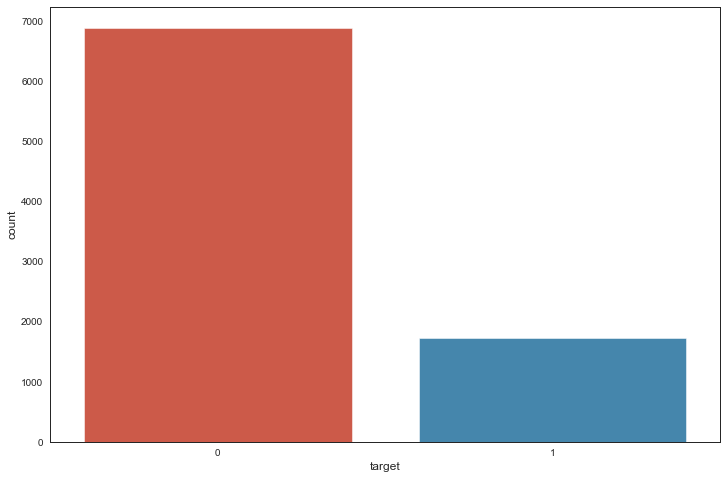

In [15]:
sns.countplot(x=df['target'])

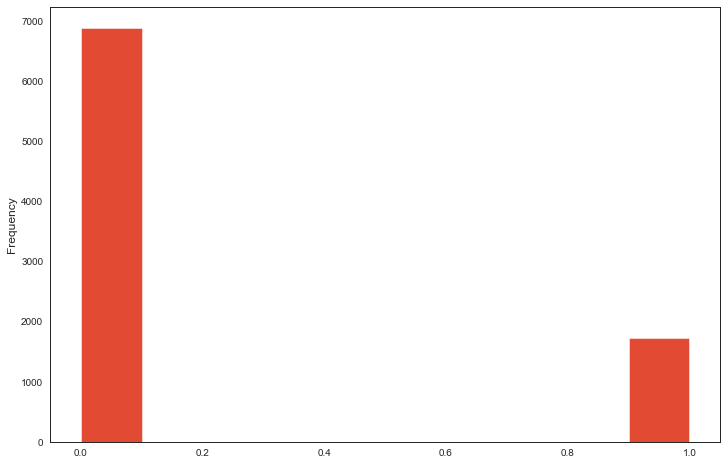

In [16]:
df['target'].astype(int).plot.hist()

In [17]:
df.dtypes.value_counts()

int64    179
dtype: int64

In [18]:
df.select_dtypes('int64').apply(pd.Series.nunique, axis = 0)

X1        978
X2        975
X3        973
X4        960
X5        956
         ... 
X175      927
X176      933
X177      956
X178      951
target      2
Length: 179, dtype: int64

In [19]:
correlations = df.corr()['target'].sort_values()

print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 X93       0.041759
X130      0.044409
X131      0.044837
X96       0.045863
X10       0.048389
X28       0.048425
X12       0.049638
X43       0.050115
X44       0.051751
X94       0.052029
X95       0.052778
X26       0.053562
X27       0.053687
X11       0.054178
target    1.000000
Name: target, dtype: float64

Most Negative Correlations:
 X176   -0.054450
X175   -0.053264
X177   -0.052473
X174   -0.049477
X61    -0.049128
X178   -0.048319
X60    -0.047425
X173   -0.046184
X83    -0.045607
X84    -0.043325
X62    -0.040830
X82    -0.039997
X85    -0.036651
X172   -0.034465
X59    -0.032828
Name: target, dtype: float64


# Implementing ML Models

In [20]:
x = df.drop(['target'], axis=1)
y = df[["target"]]

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## standardizing the input

In [22]:
sc=StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Random Forest


<img src= 'helper/rf.jpeg' alt='drawing' style='width: 400px;'/>

In [71]:
rf = RandomForestClassifier(n_estimators = 51,criterion = 'entropy',random_state=0)
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=51,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [72]:
#parameters = {'n_estimators':np.arange(100,300),'criterion':['entropy','gini'], 'max_depth': np.arange(2,12),'min_samples_leaf':np.arange(1,11)}
#GS = GridSearchCV(rf,parameters,cv=3,scoring='f1')
#GS.fit(x,y)
#GS.best_params_

In [73]:
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)

In [74]:
rf_roc = roc_auc_score(y_test, rf_pred)
print("Random Forest ROC: ", rf_roc)

Random Forest ROC:  0.924781535930914


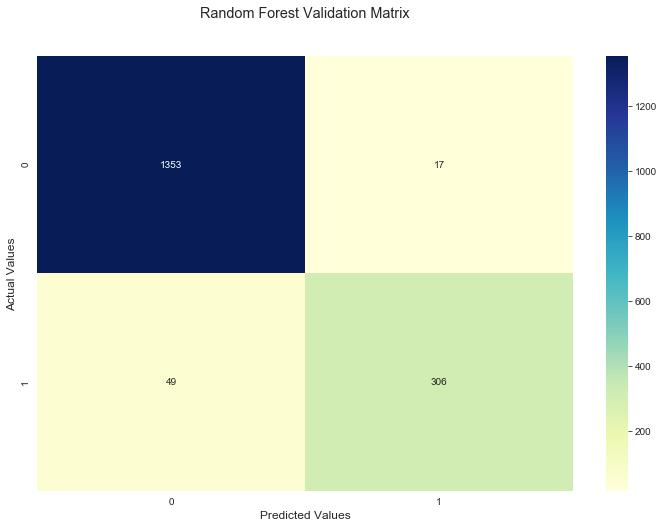

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1370
           1       0.95      0.86      0.90       355

    accuracy                           0.96      1725
   macro avg       0.96      0.92      0.94      1725
weighted avg       0.96      0.96      0.96      1725



In [75]:
rf_cm = confusion_matrix(y_test,rf_pred)
sns.heatmap(rf_cm,annot=True,fmt='.0f',cmap='YlGnBu')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Random Forest Validation Matrix\n\n")
plt.show()
print(classification_report(y_test,rf_pred))

In [128]:
# Logistic Regression Model
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)
lr_pred = lr_model.predict(x_test)

In [129]:
lr_roc = roc_auc_score(y_test, lr_pred)
print("Logistic Regression ROC: ", lr_roc)

Logistic Regression ROC:  0.5492957746478874


In [130]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90      1370
           1       1.00      0.10      0.18       355

    accuracy                           0.81      1725
   macro avg       0.91      0.55      0.54      1725
weighted avg       0.85      0.81      0.75      1725



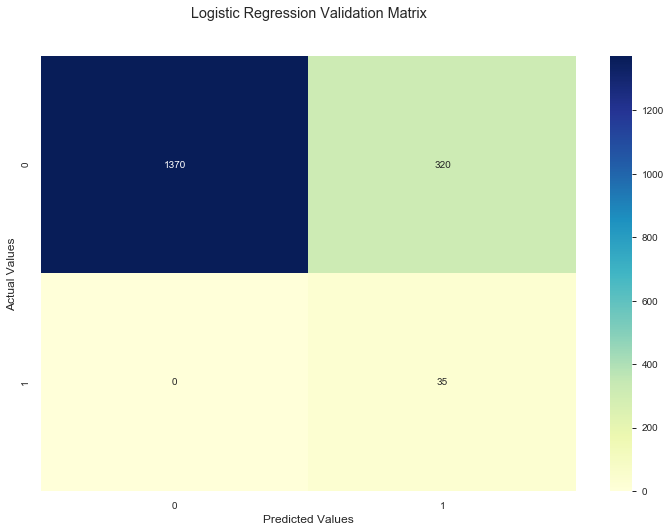

In [131]:
lr_cm = confusion_matrix(lr_pred, y_test)
sns.heatmap(lr_cm, annot = True, fmt = ".0f", cmap = "YlGnBu")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Logistic Regression Validation Matrix\n\n")
plt.show()

In [23]:
#ensemble  models
adaboost = ensemble.AdaBoostClassifier()
bag = ensemble.BaggingClassifier()
extratree = ensemble.ExtraTreesClassifier()
gbboost = ensemble.GradientBoostingClassifier()
rf = ensemble.RandomForestClassifier()

#Gaussian Process

gpc = gaussian_process.GaussianProcessClassifier()

#GLM

log = linear_model.LogisticRegressionCV()
pac = linear_model.PassiveAggressiveClassifier()
ridge = linear_model.RidgeClassifierCV()
sgd = linear_model.SGDClassifier()
perceptron = linear_model.Perceptron()

#Naive Bayes


nb = naive_bayes.BernoulliNB()
nb_gaussian = naive_bayes.GaussianNB()

#knn

knn = neighbors.KNeighborsClassifier()

#svm

sv = SVC(probability=True)
linsvc = LinearSVC()

#Trees

dt = tree.DecisionTreeClassifier()
et = tree.ExtraTreeClassifier()


#Discriminant Analysis 

lda = discriminant_analysis.LinearDiscriminantAnalysis()
qda = discriminant_analysis.QuadraticDiscriminantAnalysis()


#xgboost

xg = XGBClassifier()


In [133]:
kf = KFold(n_splits=5,shuffle=True,random_state=0)
for model , name in zip([adaboost,bag,extratree,gbboost,rf,gpc,log,pac,ridge,sgd,perceptron,nb,nb_gaussian,knn,sv,linsvc,dt,et,lda,qda,xg],
                       ['adaboost','bag','extratree','gbboost','rf','gpc','log','pac','ridge','gd','perceptron','nb','nb_gaussian','knn','svm','linsvc','dt','et','lda','qda','xg']):
    roc_auc=[]
    
    for train,test in kf.split(x,y):
        x_train,x_test = x.iloc[train,:],x.iloc[test,:]
        y_train,y_test = y.iloc[train],y.iloc[test]
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
        
        fpr,tpr,_ = roc_curve(y_test,y_pred)
        roc_auc.append(auc(fpr,tpr))
        
        
    print('Model Name: ',name)
    
    
    print('AUC Score : %0.02f (+/- %0.5f)' %(np.mean(roc_auc),np.var(roc_auc,ddof=1)))
    
    
    avg_bias = 1-np.mean(roc_auc)
    print('Bias error :',avg_bias*100)
    
    
    avg_var = np.var(roc_auc,ddof=1)
    print('Variance error: ',avg_var*10000)
    
    print('-'*100)

Model Name:  adaboost
AUC Score : 0.90 (+/- 0.00017)
Bias error : 10.177777902307717
Variance error:  1.7407540612203953
----------------------------------------------------------------------------------------------------
Model Name:  bag
AUC Score : 0.94 (+/- 0.00010)
Bias error : 6.497084224102534
Variance error:  0.9904990404607628
----------------------------------------------------------------------------------------------------
Model Name:  extratree
AUC Score : 0.94 (+/- 0.00017)
Bias error : 5.909515905933582
Variance error:  1.6542579545332692
----------------------------------------------------------------------------------------------------
Model Name:  gbboost
AUC Score : 0.93 (+/- 0.00021)
Bias error : 7.1391178824741
Variance error:  2.1269621880772287
----------------------------------------------------------------------------------------------------
Model Name:  rf
AUC Score : 0.95 (+/- 0.00017)
Bias error : 5.12151097781569
Variance error:  1.6521547227018831
---------

In [145]:
kf = KFold(n_splits=5,shuffle=True,random_state=0)
model = [adaboost,bag,extratree,gbboost,rf,gpc,log,pac,ridge,sgd,perceptron,nb,nb_gaussian,knn,sv,linsvc,dt,et,lda,qda,xg]
MLA_columns = ['MLA Name','MLA Parameters','AUC score','Bias error','Variance error']
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index=0
roc_auc=[]

for alg in model:
    for train,test in kf.split(x,y):
        x_train,x_test = x.iloc[train,:],x.iloc[test,:]
        y_train,y_test = y.iloc[train],y.iloc[test]
        alg.fit(x_train,y_train)
        y_pred = alg.predict(x_test)
        
        fpr,tpr,_ = roc_curve(y_test,y_pred)
        roc_auc.append(auc(fpr,tpr))
    
    mla_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name']= mla_name
    MLA_compare.loc[row_index,'MLA Parameters'] = str(alg.get_params())
    MLA_compare.loc[row_index, 'AUC score'] = np.mean(roc_auc)
    MLA_compare.loc[row_index, 'Bias  error'] = (1-np.mean(roc_auc))*100
    MLA_compare.loc[row_index, 'Variance error'] = (np.var(roc_auc,ddof=1))*10000
    
    row_index +=1
    
MLA_compare.sort_values(by=['AUC score'],ascending=False,inplace=True)
MLA_compare    

MLA Name  \
4          RandomForestClassifier   
3      GradientBoostingClassifier   
2            ExtraTreesClassifier   
1               BaggingClassifier   
0              AdaBoostClassifier   
5       GaussianProcessClassifier   
6            LogisticRegressionCV   
7     PassiveAggressiveClassifier   
8               RidgeClassifierCV   
20                  XGBClassifier   
17            ExtraTreeClassifier   
19  QuadraticDiscriminantAnalysis   
9                   SGDClassifier   
14                            SVC   
16         DecisionTreeClassifier   
18     LinearDiscriminantAnalysis   
15                      LinearSVC   
13           KNeighborsClassifier   
12                     GaussianNB   
10                     Perceptron   
11                    BernoulliNB   

                                       MLA Parameters AUC score Bias error  \
4   {'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...  0.929617        NaN   
3   {'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...   0.92419        NaN   
2   {'bootstrap': False, 'ccp_alpha': 0.0, 'class_...  0.922717        NaN   
1   {'base_estimator': None, 'bootstrap': True, 'b...  0.913385        NaN   
0   {'algorithm': 'SAMME.R', 'base_estimator': Non...  0.898222        NaN   
5   {'copy_X_train': True, 'kernel': None, 'max_it...  0.858015        NaN   
6   {'Cs': 10, 'class_weight': None, 'cv': None, '...  0.819177        NaN   
7   {'C': 1.0, 'average': False, 'class_weight': N...  0.796611        NaN   
8   {'alphas': array([ 0.1,  1. , 10. ]), 'class_w...  0.769124        NaN   
20  {'objective': 'binary:logistic', 'base_score':...  0.764917        NaN   
17  {'ccp_alpha': 0.0, 'class_weight': None, 'crit...  0.758784        NaN   
19  {'priors': None, 'reg_param': 0.0, 'store_cova...  0.756203        NaN   
9   {'alpha': 0.0001, 'average': False, 'class_wei...  0.753394        NaN   
14  {'C': 1.0, 'break_ties': False, 'cache_size': ...  0.751416        NaN   
16  {'ccp_alpha': 0.0, 'class_weight': None, 'crit...  0.751219        NaN   
18  {'n_components': None, 'priors': None, 'shrink...  0.748789        NaN   
15  {'C': 1.0, 'class_weight': None, 'dual': True,...    0.7422        NaN   
13  {'algorithm': 'auto', 'leaf_size': 30, 'metric...   0.73808        NaN   
12           {'priors': None, 'var_smoothing': 1e-09}  0.733299        NaN   
10  {'alpha': 0.0001, 'class_weight': None, 'early...  0.732466        NaN   
11  {'alpha': 1.0, 'binarize': 0.0, 'class_prior':...  0.716757        NaN   

   Variance error  Bias  error  
4         5.14374     7.038251  
3         4.77919     7.581039  
2         5.78534     7.728345  
1         4.77046     8.661503  
0         1.74075    10.177778  
5         269.445    14.198542  
6         323.041    18.082338  
7         318.336    20.338877  
8         344.028    23.087614  
20        307.338    23.508258  
17        310.072    24.121639  
19        306.624    24.379723  
9          332.47    24.660632  
14        332.065    24.858424  
16        317.964    24.878063  
18        311.768    25.121126  
15        324.068    25.779990  
13        328.898    26.192024  
12        351.218    26.670102  
10        346.426    26.753357  
11        344.718    28.324309

<div class='alert alert-block alert-success'>
Random Forest gave better AUC score !

<div class='alert alert-block alert-warning'>
but, Gradient Boost classifier has better bias-variance trade off

<div class='alert alert-block alert-danger'>
K-NN , Naive-Bayes performed poorly compared to other boosting and bagging models

## Statistical -testing for validation set 

In [229]:
'''
d = difference between the measure of two models
z=2.58 for 99% confidence
z=2.33 for 98% confidence
z=1.96 for 95% confidence
z=1.65 for 90% confidence
'''

from math import sqrt
def confidence_interval(m1,m2,n,z):
    d = m1-m2
    a=(m1-m2) - z*sqrt((m1*(1-m1)/n) +(m2*(1-m2)/n)) 
    b=(m1-m2) + z*sqrt((m1*(1-m1)/n) +(m2*(1-m2)/n))
    return (a,b)

In [39]:
confidence_interval(0.9296,0.92419,8625,1.28)

(0.00033646364760787483, 0.010483536352392176)

In [41]:
confidence_interval(0.9296,0.81917,8625,2.58)

(0.09759148768985958, 0.12326851231014048)

<div class='alert alert-block alert-warning'>
 With 80 % Confidence interval Random Forest is statistically significant from Gradient-Boost Classifier !

<div class='alert alert-block alert-success'>
 With 99 % Confidence interval Random Forest is statistically significant from Logistic RegressionCV , knn , suppport vector and naive bayes models !!! !

Random Forest ROC: 0.9296 
RandomForestClassifier took 8.014592300000004 seconds to predict
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1370
           1       0.93      0.92      0.93       355

    accuracy                           0.97      1725
   macro avg       0.96      0.95      0.95      1725
weighted avg       0.97      0.97      0.97      1725



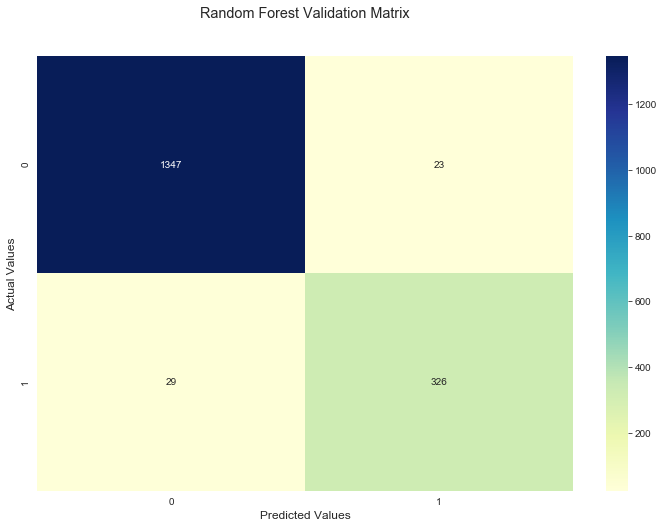

In [78]:
start= time.perf_counter()
model = RandomForestClassifier()
model.fit(x_train, y_train)
mod_pred = model.predict(x_test)
end_rfb = (time.perf_counter() - start)
roc = roc_auc_score(y_test, mod_pred)
print("Random Forest ROC: 0.9296 ")
print(f'{model.__class__.__name__} took {end_rfb} seconds to predict')
print(classification_report(y_test,mod_pred))
rf_cm = confusion_matrix(y_test,mod_pred)
sns.heatmap(rf_cm,annot=True,fmt='.0f',cmap='YlGnBu')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Random Forest Validation Matrix\n\n")
plt.show()

Logistic Regression ROC: 0.8191 
LogisticRegressionCV took 2.8019820999998046 seconds to predict
              precision    recall  f1-score   support

           0       0.82      0.99      0.90      1370
           1       0.87      0.13      0.23       355

    accuracy                           0.82      1725
   macro avg       0.84      0.56      0.56      1725
weighted avg       0.83      0.82      0.76      1725



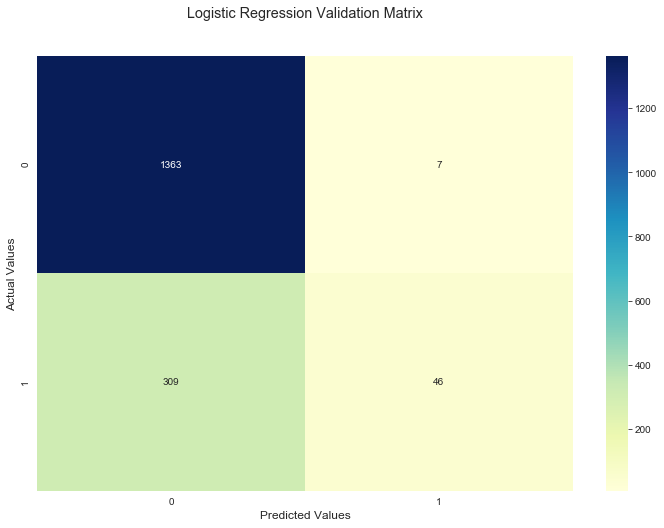

In [79]:
start= time.perf_counter()
model = linear_model.LogisticRegressionCV()
model.fit(x_train, y_train)
mod_pred = model.predict(x_test)
roc = roc_auc_score(y_test, mod_pred)
end_lrb = (time.perf_counter() - start)
print("Logistic Regression ROC: 0.8191 ")
print(f'{model.__class__.__name__} took {end_lrb} seconds to predict')
print(classification_report(y_test,mod_pred))
cm = confusion_matrix(y_test,mod_pred)
sns.heatmap(cm,annot=True,fmt='.0f',cmap='YlGnBu')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Logistic Regression Validation Matrix\n\n")
plt.show()

Text(0, 0.5, 'Algorithm')

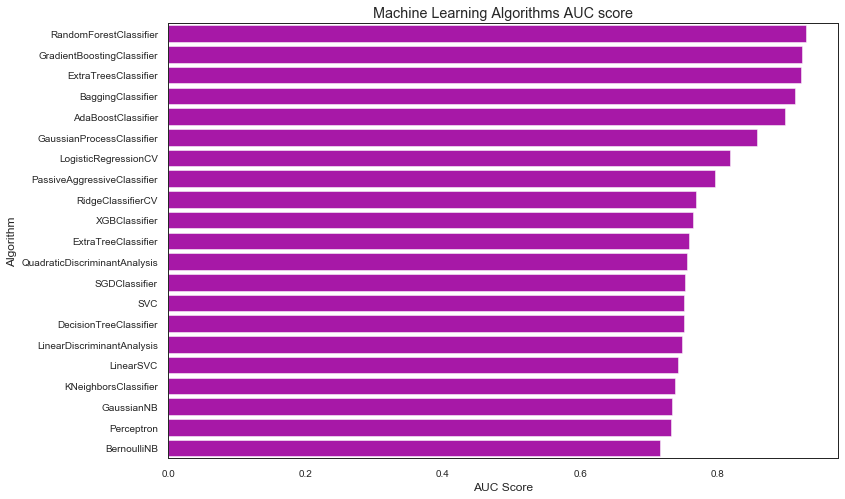

In [146]:
sns.barplot(x='AUC score',y='MLA Name',data=MLA_compare,color='m')
plt.title('Machine Learning Algorithms AUC score')
plt.xlabel('AUC Score')
plt.ylabel('Algorithm')

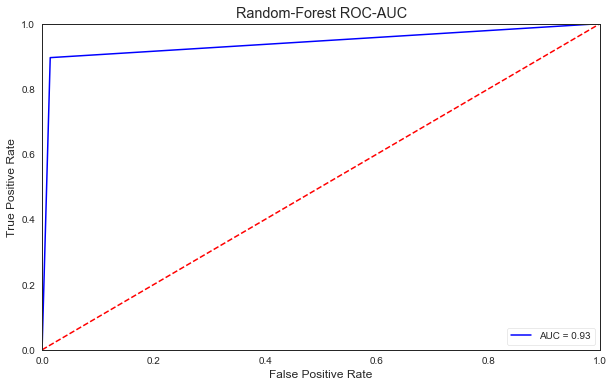

In [28]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
mod_pred = model.predict(x_test)
roc = roc_auc_score(y_test, mod_pred)
fpr, tpr, threshold = metrics.roc_curve(y_test, mod_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(10,6))
plt.title('Random-Forest ROC-AUC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Tune Model with Hyper-Parameters


In [55]:
dt = DecisionTreeClassifier()

dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
roc_score = roc_auc_score(y_test,y_pred)

print('BEFORE DT Parameters: ', dt.get_params())
print("BEFORE DT Training roc_auc_score: {:.2f}". format(roc_score.mean()*100))

param_grid = {'criterion': ['gini', 'entropy'],  #scoring methodology; two supported formulas for calculating information gain - default is gini
              #'splitter': ['best', 'random'], #splitting methodology; two supported strategies - default is best
              'max_depth': [2,4,6,8,10,None], #max depth tree can grow; default is none
              'min_samples_split': [2,5,10,.03,.05], #minimum subset size BEFORE new split (fraction is % of total); default is 2
              'min_samples_leaf': [1,5,10,.03,.05], #minimum subset size AFTER new split split (fraction is % of total); default is 1
              #'max_features': [None, 'auto'], #max features to consider when performing split; default none or all
              'random_state': [0] #seed or control random number generator: https://www.quora.com/What-is-seed-in-random-number-generation
             }
tune_model = model_selection.GridSearchCV(dt,param_grid=param_grid,scoring='roc_auc',cv=5)
tune_model.fit(x_train,y_train)
y_t = tune_model.predict(x_test)
roc = roc_auc_score(y_test,y_t)

print('After DT Parameters: ', tune_model.get_params())
print("After DT Training roc_auc_score: {:.2f}". format(roc.mean()*100))

BEFORE DT Parameters:  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}
BEFORE DT Training roc_auc_score: 88.43
After DT Parameters:  {'cv': 5, 'error_score': nan, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__presort': 'deprecated', 'estimator__random_state': None, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None

In [76]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

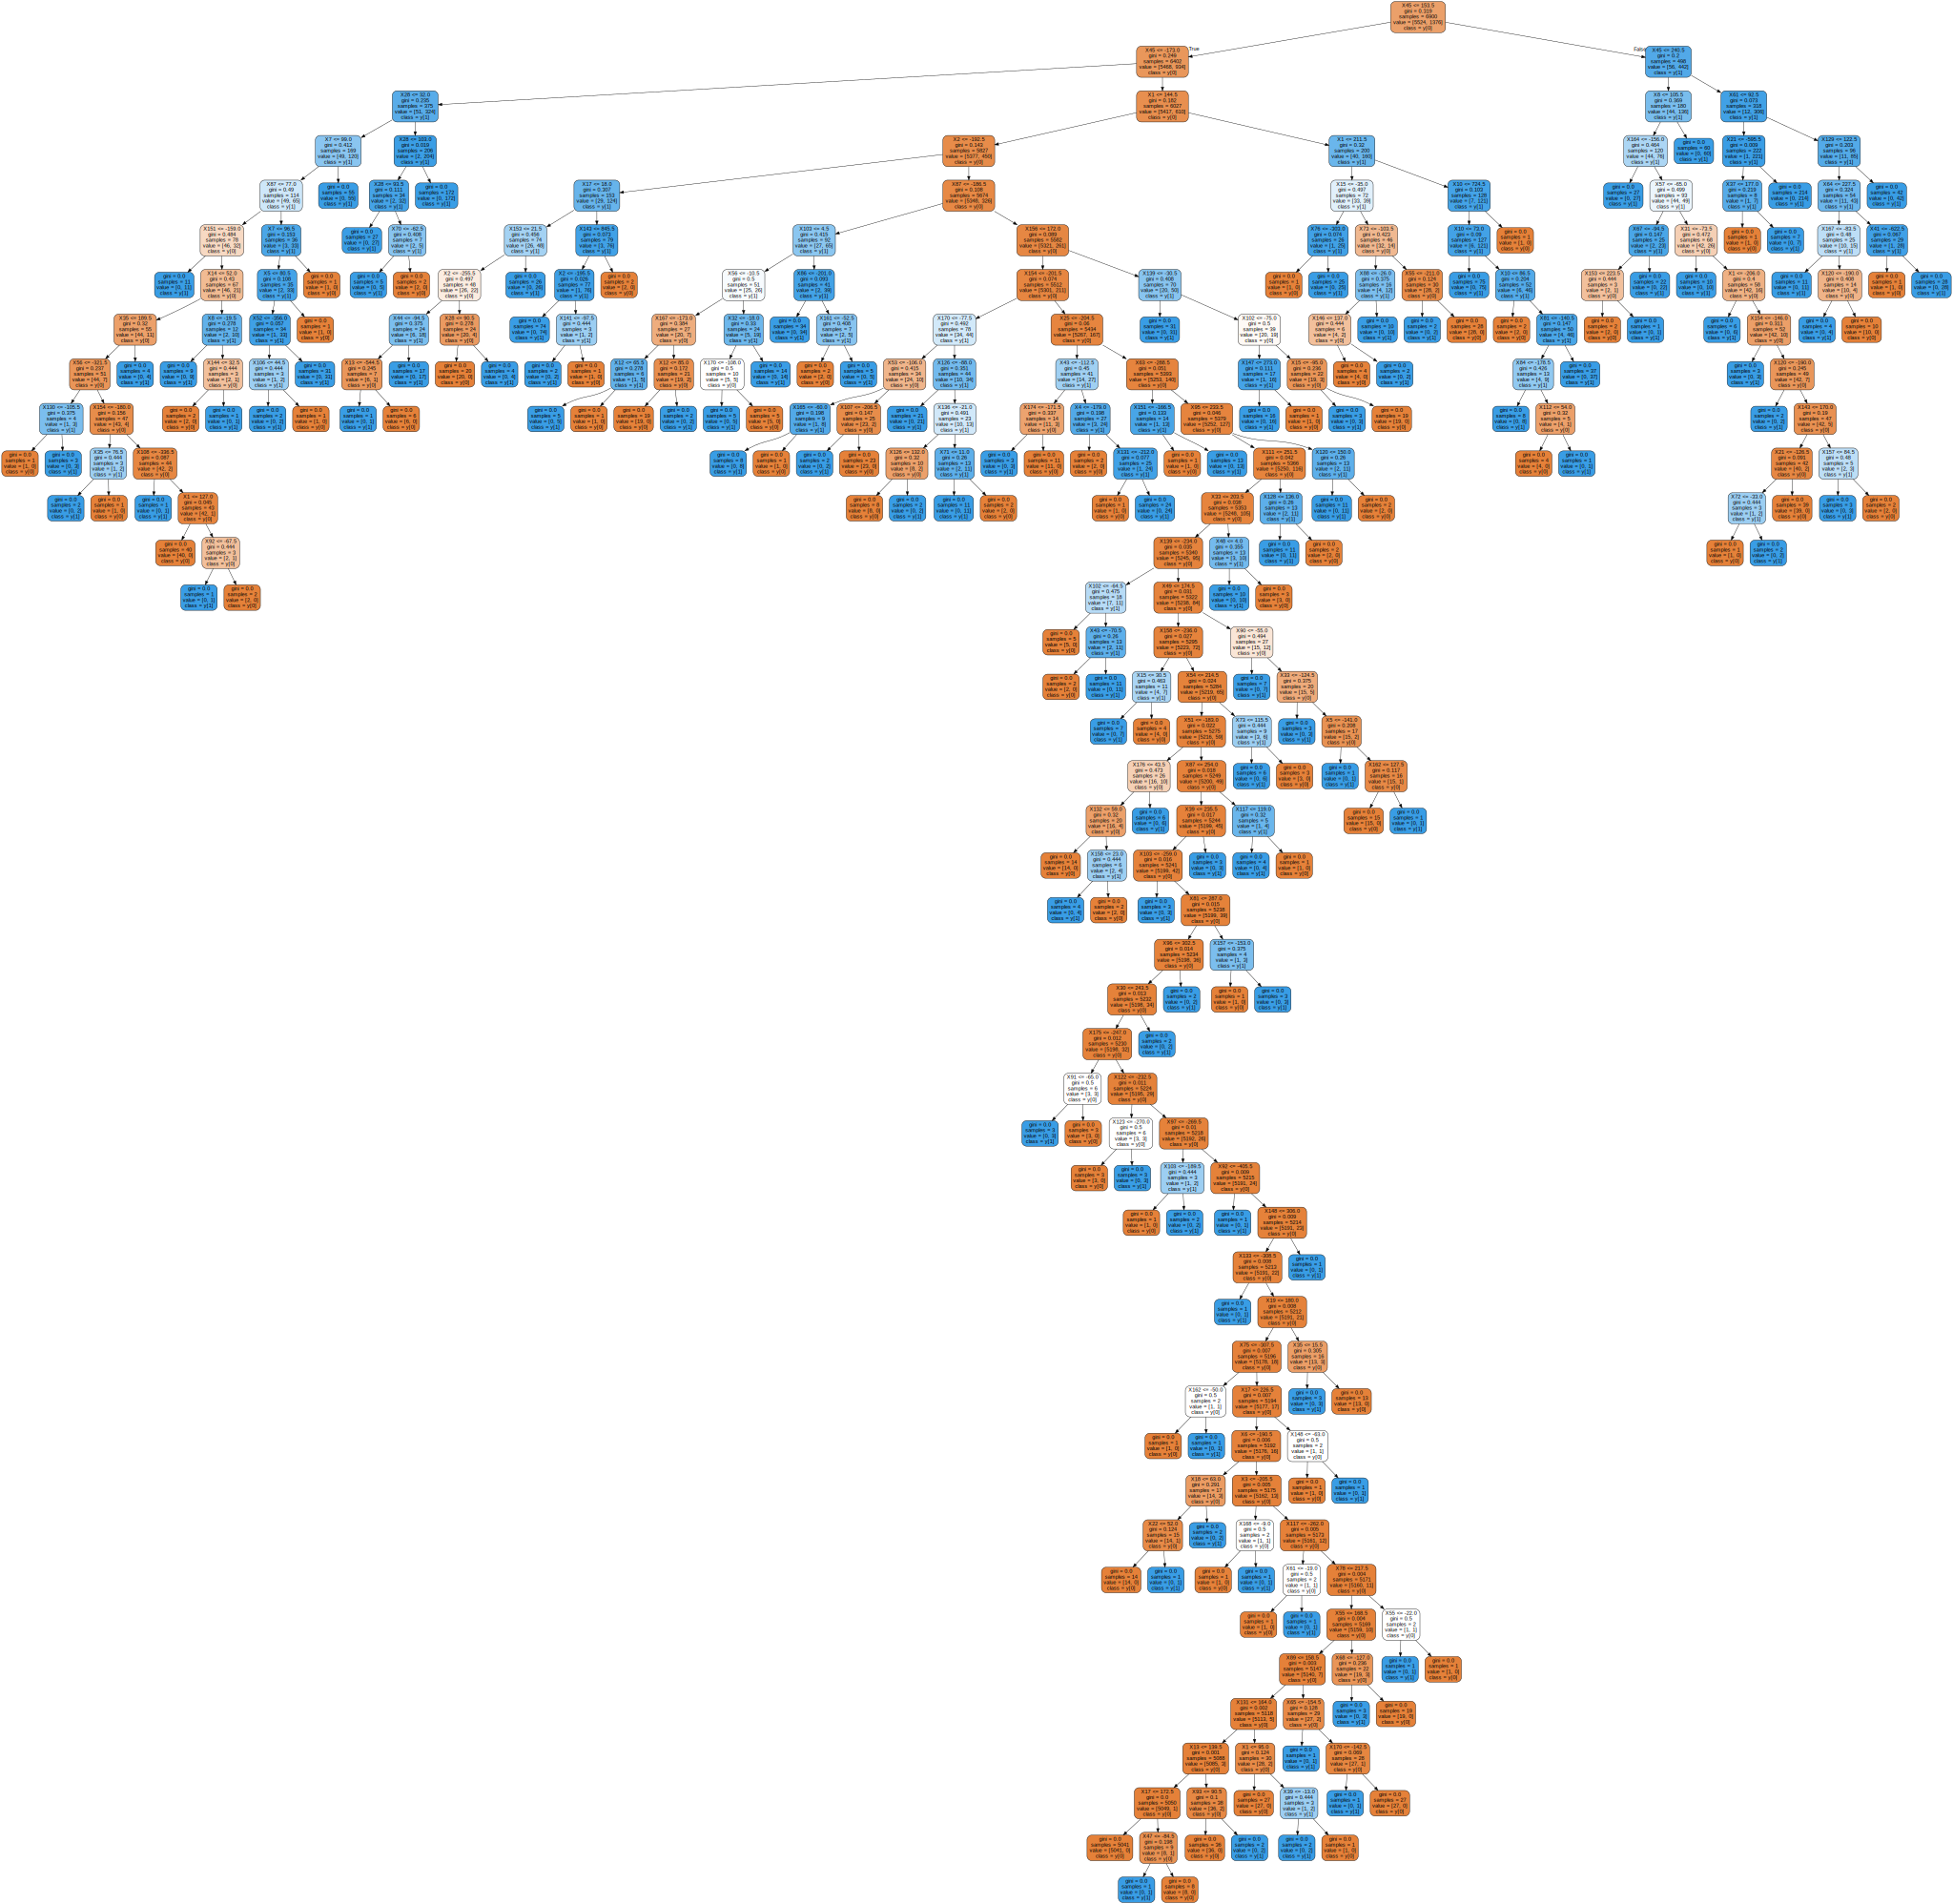

In [87]:
import graphviz 
dt = DecisionTreeClassifier()
import os
os.environ["PATH"] += os.pathsep + 'C://Users/sidha/anaconda3/Library/bin/graphviz'
dt.fit(x_train,y_train)
dot_data = tree.export_graphviz(dt, out_file=None, 
                                feature_names = a , class_names = True,
                                filled = True, rounded = True)
graph = graphviz.Source(dot_data) 
graph

In [63]:
a=x.columns

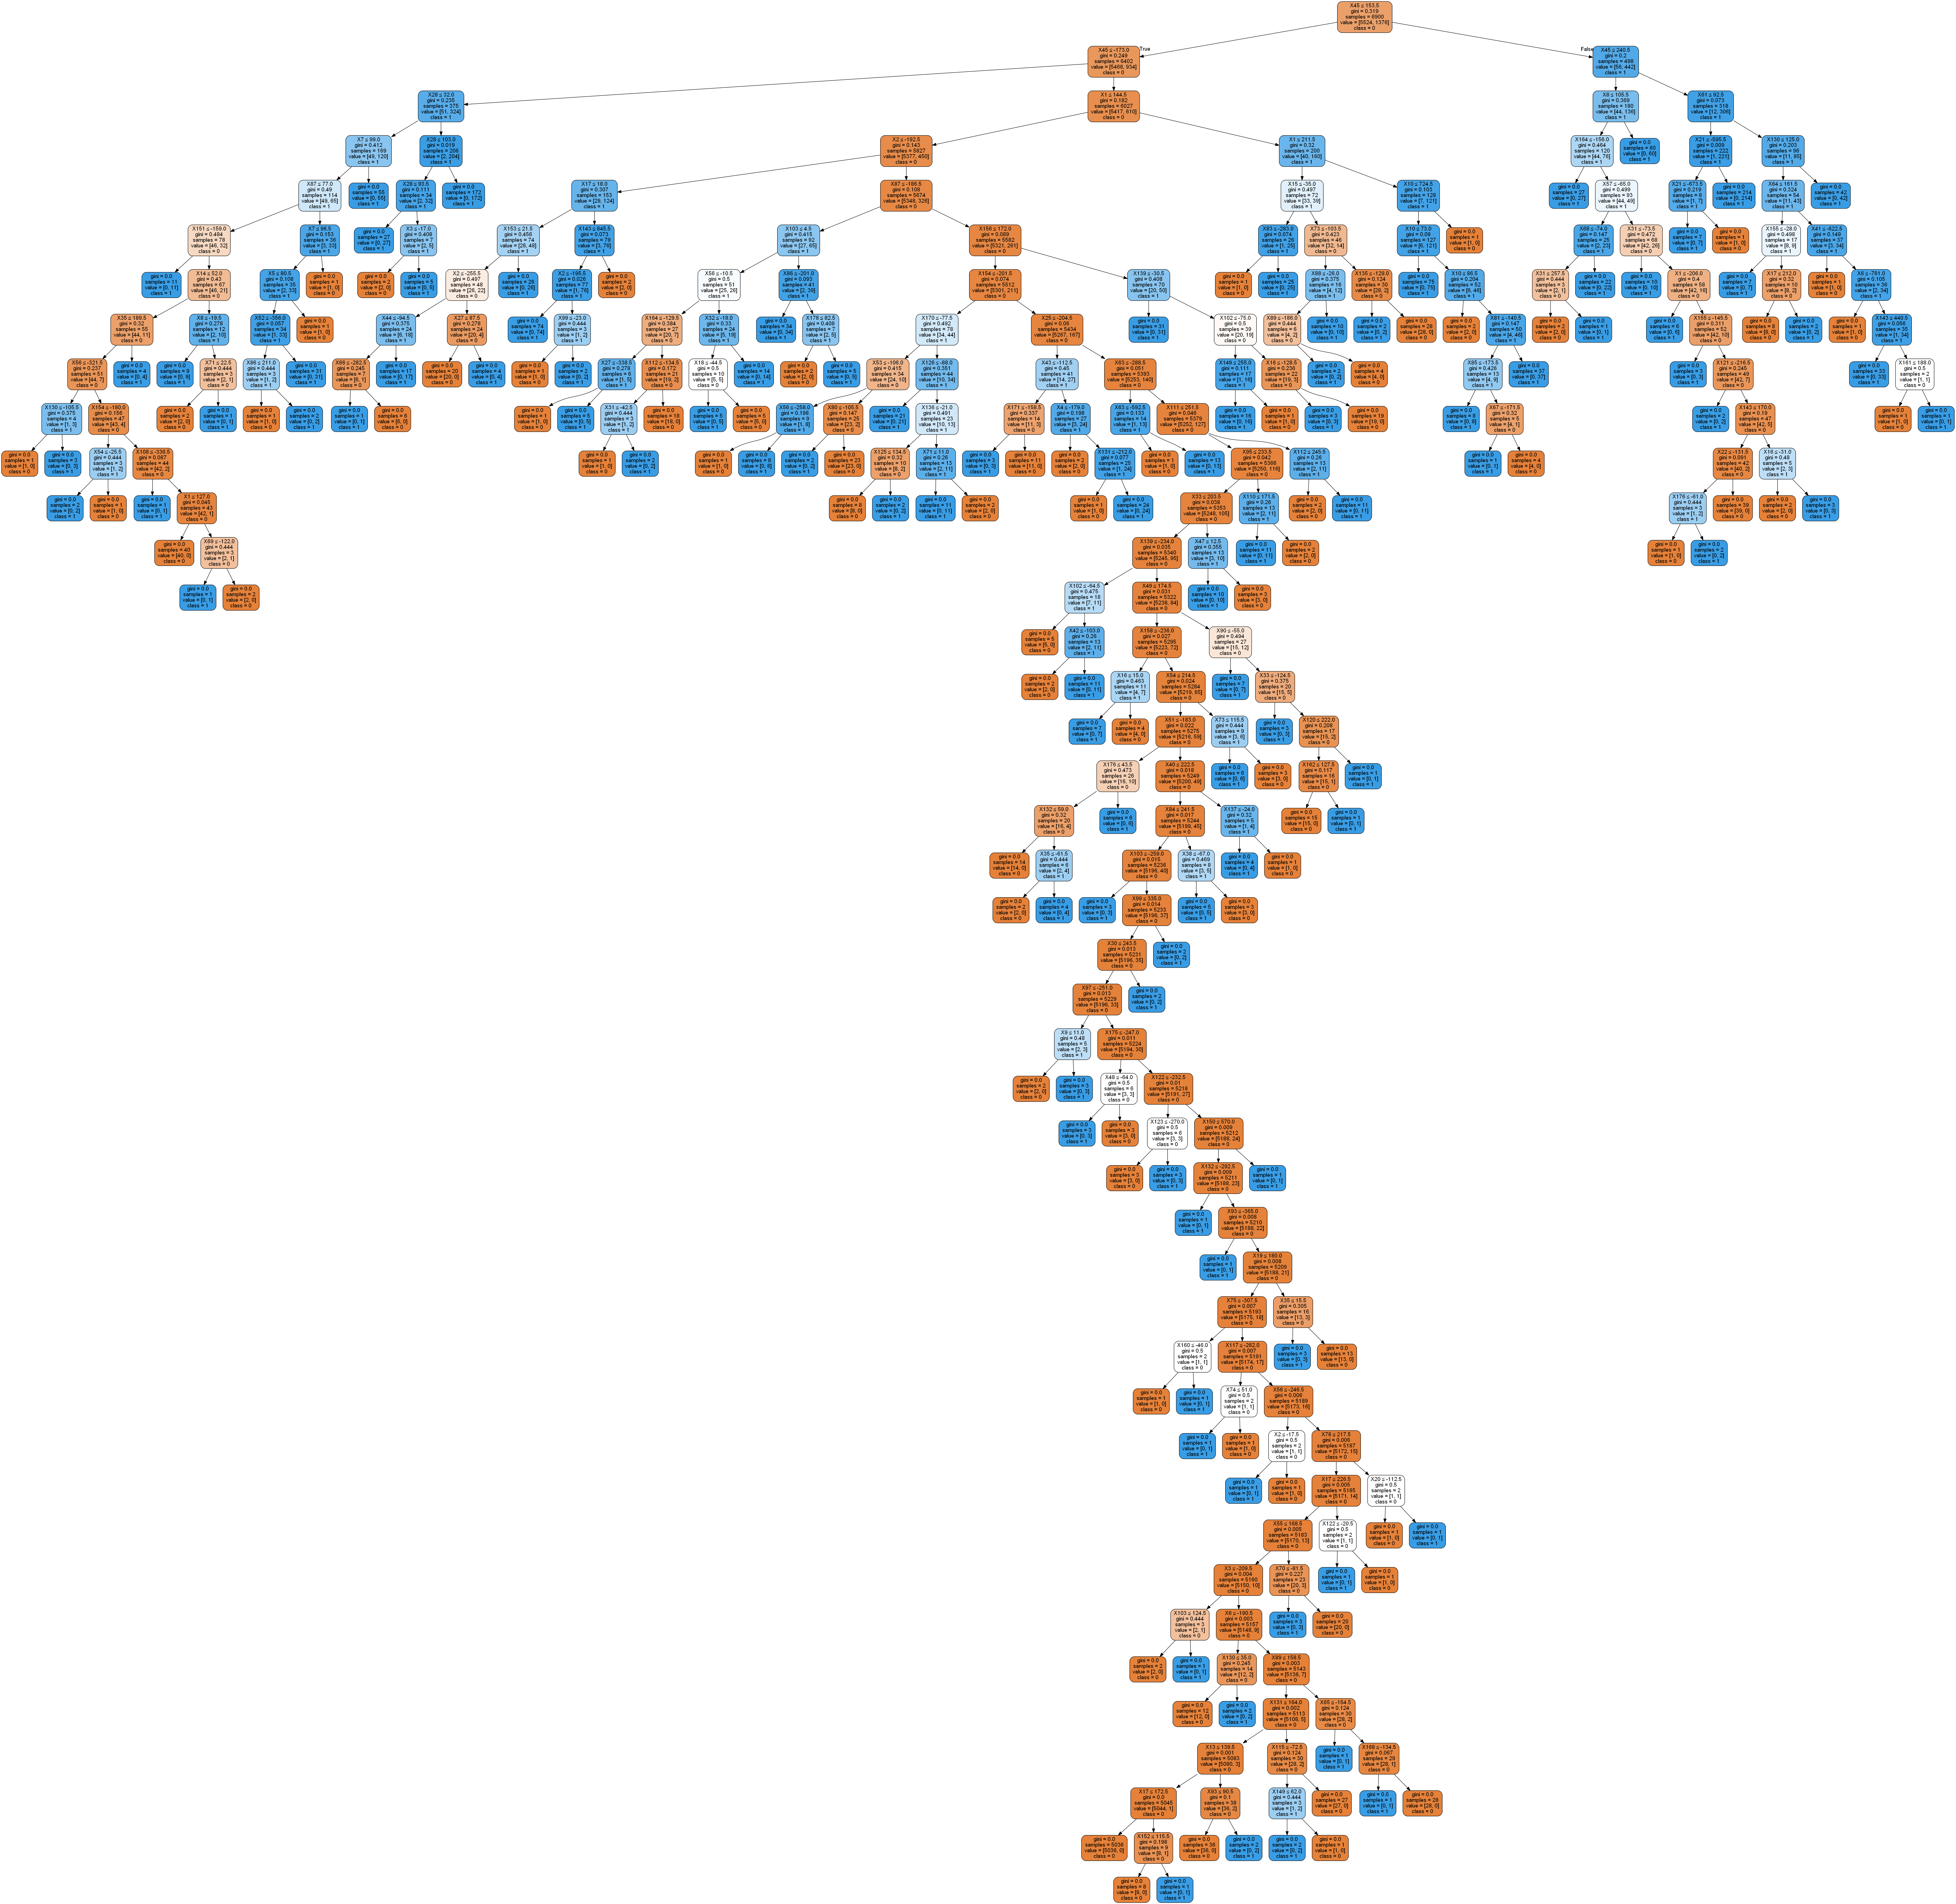

In [86]:
import os
os.environ["PATH"] += os.pathsep + 'C://Users/sidha/anaconda3/Library/bin/graphviz'
dot_data = StringIO()
g=export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = a,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('loan_gini.png')
Image(graph.create_png())
#graph = graphviz.Source(g) 
#graph

<div class='alert alert-block alert-danger'>
why choose one model, when you can pick them all with voting classifier

In [33]:
vote_est = [
    #Ensemble Methods: http://scikit-learn.org/stable/modules/ensemble.html
    ('ada', ensemble.AdaBoostClassifier()),
    ('bc', ensemble.BaggingClassifier()),
    ('etc',ensemble.ExtraTreesClassifier()),
    ('gbc', ensemble.GradientBoostingClassifier()),
    ('rfc', ensemble.RandomForestClassifier()),

    #Gaussian Processes: http://scikit-learn.org/stable/modules/gaussian_process.html#gaussian-process-classification-gpc
    ('gpc', gaussian_process.GaussianProcessClassifier()),
    
    #GLM: http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
    ('lr', linear_model.LogisticRegressionCV()),
    
    #Navies Bayes: http://scikit-learn.org/stable/modules/naive_bayes.html
    ('bnb', naive_bayes.BernoulliNB()),
    ('gnb', naive_bayes.GaussianNB()),
    
    #Nearest Neighbor: http://scikit-learn.org/stable/modules/neighbors.html
    ('knn', neighbors.KNeighborsClassifier()),
    
    #SVM: http://scikit-learn.org/stable/modules/svm.html
    ('svc', svm.SVC(probability=True)),
    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
   ('xgb', XGBClassifier())

]

#Hard vote

vote_hard = ensemble.VotingClassifier(estimators=vote_est,voting='hard')
vote_hard.fit(x_train,y_train)
y_h = vote_hard.predict(x_test)
roc_b = roc_auc_score(y_test,y_h)
print('method : hard-voting') 
print("Hard Voting roc_auc score mean: {:.2f}". format(roc_b.mean()*100))

vote_soft = ensemble.VotingClassifier(estimators=vote_est,voting='soft')
vote_soft.fit(x_train,y_train)
y_s = vote_soft.predict(x_test)
roc_a = roc_auc_score(y_test,y_s)
print('method : soft-voting') 
print("Soft Voting roc_auc score mean: {:.2f}". format(roc_a.mean()*100))

method : hard-voting
Hard Voting roc_auc score mean: 91.78
method : soft-voting
Soft Voting roc_auc score mean: 91.74


<div class='alert alert-block alert-success'>
voting classifier gave better result

In [36]:
import time

grid_n_estimator = [10, 50, 100, 300]
grid_ratio = [.1, .25, .5, .75, 1.0]
grid_learn = [.01, .03, .05, .1, .25]
grid_max_depth = [2, 4, 6, 8, 10, None]
grid_min_samples = [5, 10, .03, .05, .10]
grid_criterion = ['gini', 'entropy']
grid_bool = [True, False]
grid_seed = [0]


grid_param = [
            [{
            'n_estimators': grid_n_estimator, #default=50
            'learning_rate': grid_learn, #default=1
            #'algorithm': ['SAMME', 'SAMME.R'], #default=’SAMME.R
            'random_state': grid_seed
            }],
       
    
            [{
            'n_estimators': grid_n_estimator, #default=10
            'max_samples': grid_ratio, #default=1.0
            'random_state': grid_seed
             }],

    
            [{
            'n_estimators': grid_n_estimator, #default=10
            'criterion': grid_criterion, #default=”gini”
            'max_depth': grid_max_depth, #default=None
            'random_state': grid_seed
             }],


            [{
            'learning_rate': [.05], #default=0.1 -- 12/31/17 set to reduce runtime -- The best parameter for GradientBoostingClassifier is {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 300, 'random_state': 0} with a runtime of 264.45 seconds.
            'n_estimators': [300], #default=100 -- 12/31/17 set to reduce runtime -- The best parameter for GradientBoostingClassifier is {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 300, 'random_state': 0} with a runtime of 264.45 seconds.
            #'criterion': ['friedman_mse', 'mse', 'mae'], #default=”friedman_mse”
            'max_depth': grid_max_depth, #default=3   
            'random_state': grid_seed
             }],

    
            [{
            'n_estimators': grid_n_estimator, #default=10
            'criterion': grid_criterion, #default=”gini”
            'max_depth': grid_max_depth, #default=None
            'oob_score': [True], #default=False -- 12/31/17 set to reduce runtime -- The best parameter for RandomForestClassifier is {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 100, 'oob_score': True, 'random_state': 0} with a runtime of 146.35 seconds.
            'random_state': grid_seed
             }],
    
            [{    
            #GaussianProcessClassifier
            'max_iter_predict': grid_n_estimator, #default: 100
            'random_state': grid_seed
            }],
        
    
            [{
            'fit_intercept': grid_bool, #default: True
            #'penalty': ['l1','l2'],
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], #default: lbfgs
            'random_state': grid_seed
             }],
            
    
            [{
            'alpha': grid_ratio, #default: 1.0
             }],
    
    
            #GaussianNB - 
            [{}],
    
            [{
            'n_neighbors': [1,2,3,4,5,6,7], #default: 5
            'weights': ['uniform', 'distance'], #default = ‘uniform’
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
            }],
            
    
            [{
            #'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'C': [1,2,3,4,5], #default=1.0
            'gamma': grid_ratio, #edfault: auto
            'decision_function_shape': ['ovo', 'ovr'], #default:ovr
            'probability': [True],
            'random_state': grid_seed
             }],

    
            [{
            'learning_rate': grid_learn, #default: .3
            'max_depth': [1,2,4,6,8,10], #default 2
            'n_estimators': grid_n_estimator, 
            'seed': grid_seed  
             }]   
        ]



start_total = time.perf_counter() 
for clf, param in zip (vote_est, grid_param): 

    
    
    start = time.perf_counter()        
    best_search = model_selection.GridSearchCV(estimator = clf[1], param_grid = param, cv = 3 , scoring = 'roc_auc')
    best_search.fit(x_train,y_train)
    run = time.perf_counter() - start

    best_param = best_search.best_params_
    print('The best parameter for {} is {} with a runtime of {:.2f} seconds.'.format(clf[1].__class__.__name__, best_param, run))
    clf[1].set_params(**best_param) 


run_total = time.perf_counter() - start_total
print('Total optimization time was {:.2f} minutes.'.format(run_total/60))

print('-'*10)

The best parameter for AdaBoostClassifier is {'learning_rate': 0.05, 'n_estimators': 300, 'random_state': 0} with a runtime of 362.51 seconds.
The best parameter for BaggingClassifier is {'max_samples': 1.0, 'n_estimators': 300, 'random_state': 0} with a runtime of 2224.36 seconds.
The best parameter for ExtraTreesClassifier is {'criterion': 'entropy', 'max_depth': None, 'n_estimators': 300, 'random_state': 0} with a runtime of 80.46 seconds.
The best parameter for GradientBoostingClassifier is {'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 300, 'random_state': 0} with a runtime of 1329.96 seconds.
The best parameter for RandomForestClassifier is {'criterion': 'entropy', 'max_depth': None, 'n_estimators': 300, 'oob_score': True, 'random_state': 0} with a runtime of 328.75 seconds.
The best parameter for GaussianProcessClassifier is {'max_iter_predict': 10, 'random_state': 0} with a runtime of 487.53 seconds.
The best parameter for LogisticRegressionCV is {'fit_intercept': Fals

<div class='alert alert-block alert-warning'>
time taken for tuning the parameters of our model is around 3 hours . 


This parameter tuning method is very computational intensive and time expensive,but gave best hyper-parameters for our model !

In [37]:
grid_hard = ensemble.VotingClassifier(estimators=vote_est,voting='hard')
grid_hard.fit(x_train,y_train)
y_h = grid_hard.predict(x_test)
roc_b = roc_auc_score(y_test,y_h)
print('method : hard-voting') 
print("Hard Voting roc_auc score mean: {:.2f}". format(roc_b.mean()*100))

grid_soft = ensemble.VotingClassifier(estimators=vote_est,voting='soft')
grid_soft.fit(x_train,y_train)
y_s = grid_soft.predict(x_test)
roc_a = roc_auc_score(y_test,y_s)
print('method : soft-voting') 
print("Soft Voting roc_auc score mean: {:.2f}". format(roc_a.mean()*100))

method : hard-voting
Hard Voting roc_auc score mean: 91.53
method : soft-voting
Soft Voting roc_auc score mean: 92.09


# evaluating the  model on test set

In [31]:
df_test = pd.read_csv('testmodel.csv')
df_test = df_test.drop('s.no',axis=1)
print('test model shape :',df_test.shape)
df_test.head()

test model shape : (2875, 179)


X1   X2   X3   X4   X5   X6   X7   X8   X9  X10  ...  X170  X171  X172  \
0  -27  -44  -46  -41  -42  -49  -61  -74  -92 -107  ...   157   204   200   
1  -41  -53  -35  -13   -1    4   -4  -22  -20   -2  ...    91    92    79   
2   18   76  115  124  121  123  116  123  119  107  ...    66    96    86   
3    6   -8  -20  -21  -33  -34  -31  -19    4   35  ...   -18    -8   -10   
4 -293 -236 -181 -133  -96  -60  -31  -11    6   21  ...   -83  -113  -140   

   X173  X174  X175  X176  X177  X178  y  
0   180   165   156   156   153   150  1  
1    72    53    20    -9   -11     2  5  
2    -1   -99  -159  -139   -32    83  1  
3   -14   -25   -29   -23    -6     3  4  
4  -170  -186  -185  -157  -120   -87  1  

[5 rows x 179 columns]

In [32]:
df_test=df_test.rename(columns={'y':'target'})
df_test['target']=df_test['target'].replace(2,0)
df_test['target']=df_test['target'].replace(3,0)
df_test['target']=df_test['target'].replace(4,0)
df_test['target']=df_test['target'].replace(5,0)
x = df_test.drop(['target'], axis=1)
x = sc.transform(x)
y = df_test[["target"]]

In [327]:
#ensemble  models
adaboost = ensemble.AdaBoostClassifier(n_estimators=300,learning_rate=0.05)
bag = ensemble.BaggingClassifier(n_estimators=300,max_samples=1.00)
extratree = ensemble.ExtraTreesClassifier(n_estimators=300,criterion='entropy',max_depth=6)
gbboost = ensemble.GradientBoostingClassifier(learning_rate=0.05, max_depth= 8, n_estimators=300)
rf = ensemble.RandomForestClassifier(n_estimators=300,criterion='entropy',oob_score=True)


#Gaussian Process
gpc = gaussian_process.GaussianProcessClassifier(max_iter_predict=10)


#GLM
log = linear_model.LogisticRegressionCV(fit_intercept=False,solver='lbfgs')
pac = linear_model.PassiveAggressiveClassifier()
ridge = linear_model.RidgeClassifierCV()
sgd = linear_model.SGDClassifier()
perceptron = linear_model.Perceptron()

#Naive Bayes
nb = naive_bayes.BernoulliNB(alpha=1.0)
nb_gaussian = naive_bayes.GaussianNB()

#knn
knn = neighbors.KNeighborsClassifier(algorithm= 'auto', n_neighbors= 7, weights= 'distance')

#svm
sv = SVC(C= 1, decision_function_shape= 'ovo' , gamma=  0.1, probability= True)
linsvc = LinearSVC()

#Trees
dt = tree.DecisionTreeClassifier()
et = tree.ExtraTreeClassifier()


#Discriminant Analysis 
lda = discriminant_analysis.LinearDiscriminantAnalysis()
qda = discriminant_analysis.QuadraticDiscriminantAnalysis()


#xgboost
xg = XGBClassifier(learning_rate= 0.1, max_depth= 10, n_estimators= 300)


In [124]:
#kf = KFold(n_splits=5,shuffle=True,random_state=0)
model = [adaboost,bag,extratree,gbboost,rf,gpc,log,pac,ridge,sgd,perceptron,nb,nb_gaussian,knn,sv,linsvc,dt,et,lda,qda,xg]
MLA_columns = ['MLA Name','MLA Parameters','AUC score','Bias error','Variance error']
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index=0
roc_auc=[]

for alg in model:
   
    alg.fit(x_train,y_train)
    y_pred = alg.predict(x)

    fpr,tpr,_ = roc_curve(y,y_pred)
    roc_auc.append(auc(fpr,tpr))

    mla_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name']= mla_name
    MLA_compare.loc[row_index,'MLA Parameters'] = str(alg.get_params())
    MLA_compare.loc[row_index, 'AUC score'] = np.mean(roc_auc)
    MLA_compare.loc[row_index, 'Bias  error'] = (1-np.mean(roc_auc))*100
    MLA_compare.loc[row_index, 'Variance error'] = (np.var(roc_auc,ddof=1))*10000
    
    row_index +=1
    
MLA_compare.sort_values(by=['AUC score'],ascending=False,inplace=True)
MLA_compare    

MLA Name  \
1               BaggingClassifier   
4          RandomForestClassifier   
3      GradientBoostingClassifier   
5       GaussianProcessClassifier   
2            ExtraTreesClassifier   
0              AdaBoostClassifier   
6            LogisticRegressionCV   
7     PassiveAggressiveClassifier   
8               RidgeClassifierCV   
20                  XGBClassifier   
9                   SGDClassifier   
17            ExtraTreeClassifier   
14                            SVC   
19  QuadraticDiscriminantAnalysis   
16         DecisionTreeClassifier   
10                     Perceptron   
18     LinearDiscriminantAnalysis   
13           KNeighborsClassifier   
15                      LinearSVC   
12                     GaussianNB   
11                    BernoulliNB   

                                       MLA Parameters AUC score Bias error  \
1   {'base_estimator': None, 'bootstrap': True, 'b...  0.912104        NaN   
4   {'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...  0.906306        NaN   
3   {'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...  0.897916        NaN   
5   {'copy_X_train': True, 'kernel': None, 'max_it...  0.893987        NaN   
2   {'bootstrap': False, 'ccp_alpha': 0.0, 'class_...  0.889424        NaN   
0   {'algorithm': 'SAMME.R', 'base_estimator': Non...   0.87223        NaN   
6   {'Cs': 10, 'class_weight': None, 'cv': None, '...  0.846553        NaN   
7   {'C': 1.0, 'average': False, 'class_weight': N...  0.816231        NaN   
8   {'alphas': array([ 0.1,  1. , 10. ]), 'class_w...  0.785464        NaN   
20  {'objective': 'binary:logistic', 'base_score':...  0.775276        NaN   
9   {'alpha': 0.0001, 'average': False, 'class_wei...  0.772166        NaN   
17  {'ccp_alpha': 0.0, 'class_weight': None, 'crit...  0.770734        NaN   
14  {'C': 1, 'break_ties': False, 'cache_size': 20...  0.769889        NaN   
19  {'priors': None, 'reg_param': 0.0, 'store_cova...  0.766837        NaN   
16  {'ccp_alpha': 0.0, 'class_weight': None, 'crit...  0.763763        NaN   
10  {'alpha': 0.0001, 'class_weight': None, 'early...  0.760467        NaN   
18  {'n_components': None, 'priors': None, 'shrink...  0.760186        NaN   
13  {'algorithm': 'auto', 'leaf_size': 30, 'metric...   0.75649        NaN   
15  {'C': 1.0, 'class_weight': None, 'dual': True,...  0.756359        NaN   
12           {'priors': None, 'var_smoothing': 1e-09}  0.754471        NaN   
11  {'alpha': 1.0, 'binarize': 0.0, 'class_prior':...  0.739892        NaN   

   Variance error  Bias  error  
1         31.7987     8.789614  
4         21.3487     9.369354  
3         23.7713    10.208431  
5         26.1851    10.601296  
2         31.3305    11.057588  
0             NaN    12.777015  
6          179.32    15.344698  
7         227.257    18.376909  
8         284.046    21.453628  
20        272.086    22.472401  
9         270.167    22.783367  
17         270.24    22.926609  
14         275.49    23.011065  
19        270.665    23.316253  
16        277.835    23.623736  
10        258.206    23.953289  
18        276.364    23.981351  
13        267.679    24.350993  
15        286.417    24.364139  
12        289.367    24.552882  
11        285.531    26.010758

<div class='alert alert-block alert-success'>
Contray to my expectations Bagging classifier gave best AUC Score

<div class='alert alert-block alert-success'>
Gaussian-Process classifier gave better AUC Score and bias-variance trade-off

<div class='alert alert-block alert-warning'>
Random forest came 2nd in our prediction and gave comparitively better result

## statistical test on test-set

In [252]:
m1 = ROC-score of model-1
m2 = ROC-score of mode-2
n = total rows

def confidence_interval(m1,m2,n,z):
    d = m1-m2
    a=(m1-m2) - z*sqrt((m1*(1-m1)/n) +(m2*(1-m2)/n)) 
    b=(m1-m2) + z*sqrt((m1*(1-m1)/n) +(m2*(1-m2)/n))
    return (a,b)

confidence_interval(0.917104,0.90630,2875,1.150)

(0.0021996697492111944, 0.019408330250788877)

<div class='alert alert-block alert-success'>
With 75 % Confidence interval Bagging Classifier is statistically significant from Random-Forest Classifier !

In [240]:
confidence_interval(0.8939,0.8465,2875,2.58)

(0.024587118921207466, 0.07021288107879253)

<div class='alert alert-block alert-success'>
With 99 % Confidence interval Gaussian-Process Classifier is statistically significant from Logistic RegressionCV Classifier and other models !

In [328]:
import time
start= time.perf_counter()
model = ensemble.BaggingClassifier(n_estimators=300,max_samples=1.00)
model.fit(x_train, y_train)
mod_pred = model.predict(x)
end_bgcb = (time.perf_counter() - start)
roc = roc_auc_score(y, mod_pred)
print("Bagging Classifier ROC:",roc)
print(f'{model.__class__.__name__} took {end_bgcb} seconds to predict')
#print(classification_report(y,mod_pred))
#rf_cm = confusion_matrix(y,mod_pred)
#sns.heatmap(rf_cm,annot=True,fmt='.0f',cmap='YlGnBu')
#plt.xlabel("Predicted Values")
#plt.ylabel("Actual Values")
#plt.title("Random Forest Validation Matrix\n\n")
#plt.show()

Bagging Classifier ROC: 0.9513159679722951
BaggingClassifier took 308.01017069999943 seconds to predict


GaussianProcessClassifier took 92.32477220000055 seconds to predict
Gaussian Process ROC:  0.8323899447761398
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2306
           1       0.99      0.67      0.80       569

    accuracy                           0.93      2875
   macro avg       0.96      0.83      0.88      2875
weighted avg       0.94      0.93      0.93      2875



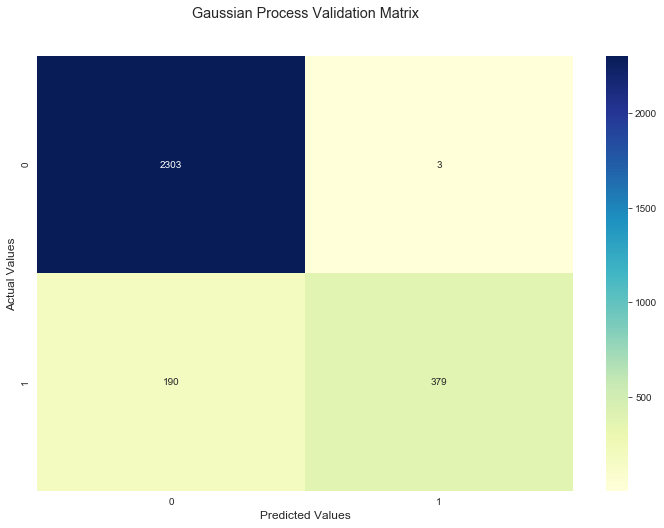

In [129]:
import time
start= time.perf_counter()
model = gaussian_process.GaussianProcessClassifier(max_iter_predict=10)
model.fit(x_train, y_train)
mod_pred = model.predict(x)
end_gpb = (time.perf_counter() - start)
roc = roc_auc_score(y, mod_pred)
print(f'{model.__class__.__name__} took {end_gpb} seconds to predict')
print("Gaussian Process ROC: ",roc)
print(classification_report(y,mod_pred))
cm = confusion_matrix(y,mod_pred)
sns.heatmap(cm,annot=True,fmt='.0f',cmap='YlGnBu')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Gaussian Process Validation Matrix\n\n")
plt.show()

Support Vector Classifier ROC: 0.7698
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      2306
           1       0.75      1.00      0.86       569

    accuracy                           0.93      2875
   macro avg       0.88      0.96      0.91      2875
weighted avg       0.95      0.93      0.94      2875

SVC took 23.515539399999398 seconds to predict


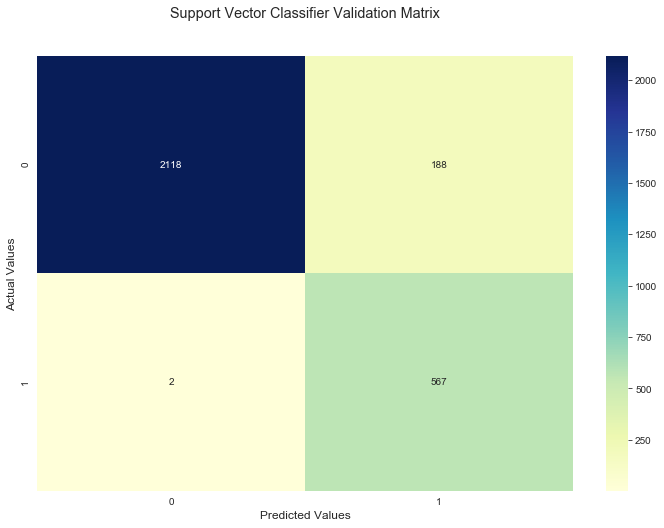

In [131]:
start= time.perf_counter()
model = SVC(C= 1, decision_function_shape= 'ovo' , gamma=  0.1, probability= True)
model.fit(x_train, y_train)
mod_pred = model.predict(x)
end_svb = (time.perf_counter() - start)
roc = roc_auc_score(y, mod_pred)
print("Support Vector Classifier ROC: 0.7698")
print(classification_report(y,mod_pred))
print(f'{model.__class__.__name__} took {end_svb} seconds to predict')
cm = confusion_matrix(y,mod_pred)
sns.heatmap(cm,annot=True,fmt='.0f',cmap='YlGnBu')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Support Vector Classifier Validation Matrix\n\n")
plt.show()

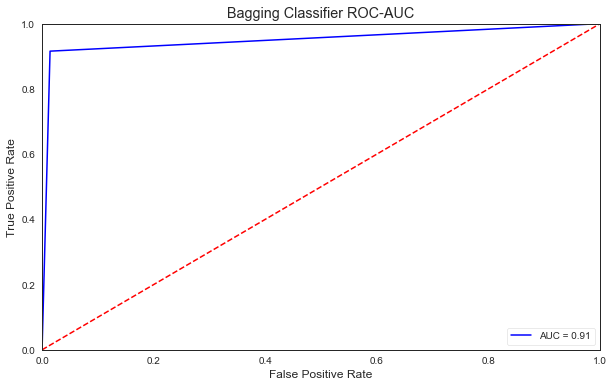

In [33]:
model = ensemble.BaggingClassifier(n_estimators=300,max_samples=1.00)
model.fit(x_train, y_train)
mod_pred = model.predict(x)
roc = roc_auc_score(y, mod_pred)
fpr, tpr, threshold = metrics.roc_curve(y, mod_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(10,6))
plt.title('Bagging Classifier ROC-AUC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# PCA

In [132]:
from sklearn.decomposition import PCA
def do_pca(n_components,data):
    
    x=StandardScaler().fit_transform(data)
    pca = PCA(n_components)
    x_pca = pca.fit_transform(x)
    
    return pca , x_pca

In [133]:
pca , x_pca = do_pca(15,x)

In [134]:
def scree_plot(pca):
    
    num = len(pca.explained_variance_ratio_)
    ind = np.arange(num)
    vals = pca.explained_variance_ratio_
    
    plt.figure(figsize=(10,6))
    ax=plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind,vals)
    ax.plot(ind,cumvals)
    
    for i  in range(num):
        ax.annotate(r'%s%%'%((str(vals[i]*100)[:4])),(ind[i]+0.2,vals[i]),va='bottom',ha='center',fontsize=12)
    
    
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2,length=12)
    
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

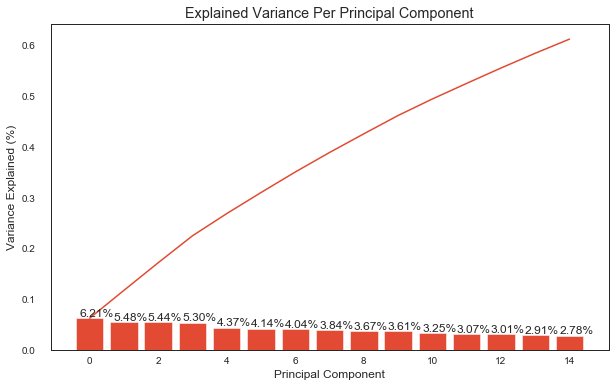

In [135]:
scree_plot(pca)

<div class='alert alert-block alert-warning'>
pca with 15 components can cover 60% of variance in our dataset

In [136]:
pca.explained_variance_ratio_.sum()

0.6117950900459652

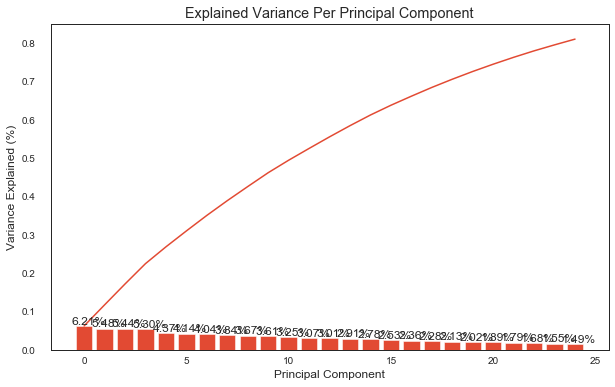

In [137]:
pca , x_pca = do_pca(25,x)
def scree_plot(pca):
    
    num = len(pca.explained_variance_ratio_)
    ind = np.arange(num)
    vals = pca.explained_variance_ratio_
    
    plt.figure(figsize=(10,6))
    ax=plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind,vals)
    ax.plot(ind,cumvals)
    
    for i  in range(num):
        ax.annotate(r'%s%%'%((str(vals[i]*100)[:4])),(ind[i]+0.2,vals[i]),va='bottom',ha='center',fontsize=12)
    
    
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2,length=12)
    
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')
scree_plot(pca) 

In [138]:
pca.explained_variance_ratio_.sum()

0.8094839587260844

<div class='alert alert-block alert-warning'>
pca with 25 components can cover 80% of variance in our dataset

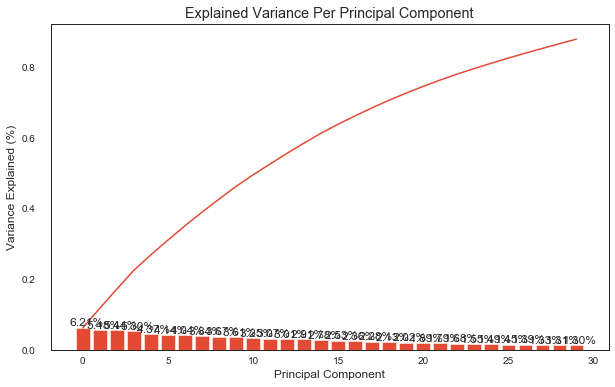

In [139]:
pca , x_pca = do_pca(30,x)
def scree_plot(pca):
    
    num = len(pca.explained_variance_ratio_)
    ind = np.arange(num)
    vals = pca.explained_variance_ratio_
    
    plt.figure(figsize=(10,6))
    ax=plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind,vals)
    ax.plot(ind,cumvals)
    
    for i  in range(num):
        ax.annotate(r'%s%%'%((str(vals[i]*100)[:4])),(ind[i]+0.2,vals[i]),va='bottom',ha='center',fontsize=12)
    
    
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2,length=12)
    
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')
scree_plot(pca) 

In [140]:
pca.explained_variance_ratio_.sum()

0.8776723847305621

<div class='alert alert-block alert-success'>
pca with 30 components can cover 88% of variance in our dataset

In [141]:
df_test1 = df_test.drop('target',axis=1)

In [ ]:
def pca_result(dataset,pca):
    
    dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    components = pd.DataFrame(np.round(pca.components_,4),columns = dataset.keys())
    components.index = dimensions
    
    var = pca.explained_variance_ratio_.reshape(-1,1)
    rat = pd.DataFrame(np.round(var,4),columns = ['explained variance'])
    rat.index = dimensions
    
    
    fig, ax = plt.subplots(figsize=(14,8))
    
    components.plot(ax=ax,kind='bar')
    ax.set_ylabel('feature weights')
    ax.set_xticklabels(dimensions,rotation=0)
    
    
    for i,e in enumerate(pca.explained_variance_ratio_):
        ax.text(i,ax.set_ylim()[1]+0.05,'explained variance\n           %0.4f'%(e))
    
    return pd.concat([rat,components],axis=1)

explained variance      X1      X2      X3      X4      X5  \
Dimension 1               0.0621  0.0076  0.0081  0.0078  0.0043  0.0001   
Dimension 2               0.0548 -0.0697 -0.0738 -0.0688 -0.0544 -0.0337   
Dimension 3               0.0544 -0.0518 -0.0591 -0.0618 -0.0578 -0.0494   
Dimension 4               0.0530  0.0704  0.0848  0.1016  0.1161  0.1259   
Dimension 5               0.0438 -0.0393 -0.0493 -0.0563 -0.0601 -0.0604   
Dimension 6               0.0415 -0.0032 -0.0039 -0.0044 -0.0021  0.0005   
Dimension 7               0.0404  0.0206  0.0157  0.0154  0.0195  0.0313   
Dimension 8               0.0384  0.0321  0.0350  0.0414  0.0498  0.0613   
Dimension 9               0.0367 -0.0047 -0.0286 -0.0575 -0.0839 -0.1078   
Dimension 10              0.0361  0.0508  0.0615  0.0695  0.0744  0.0834   
Dimension 11              0.0325 -0.0023  0.0038  0.0136  0.0203  0.0306   
Dimension 12              0.0307  0.1571  0.1704  0.1802  0.1828  0.1714   
Dimension 13              0.0302 -0.1539 -0.1678 -0.1736 -0.1710 -0.1580   
Dimension 14              0.0291 -0.0746 -0.0824 -0.0964 -0.1109 -0.1269   
Dimension 15              0.0278 -0.0114 -0.0118 -0.0079 -0.0015  0.0061   
Dimension 16              0.0254 -0.0561 -0.0605 -0.0500 -0.0269 -0.0009   
Dimension 17              0.0236  0.1031  0.1308  0.1410  0.1276  0.0840   
Dimension 18              0.0228  0.0647  0.0515  0.0367  0.0249  0.0178   
Dimension 19              0.0214  0.0006 -0.0017  0.0107  0.0371  0.0673   
Dimension 20              0.0202  0.0293  0.0360  0.0481  0.0558  0.0569   
Dimension 21              0.0190 -0.0076 -0.0182 -0.0221 -0.0145  0.0028   
Dimension 22              0.0180  0.0618  0.0577  0.0391  0.0078 -0.0257   
Dimension 23              0.0169  0.0400  0.0412  0.0310  0.0169 -0.0022   
Dimension 24              0.0156 -0.1458 -0.1518 -0.1339 -0.1031 -0.0446   
Dimension 25              0.0150 -0.0721 -0.0864 -0.0971 -0.0900 -0.0682   
Dimension 26              0.0145 -0.0825 -0.0993 -0.1079 -0.0948 -0.0655   
Dimension 27              0.0140 -0.0024  0.0061  0.0087  0.0009 -0.0082   
Dimension 28              0.0134  0.0884  0.0806  0.0710  0.0530  0.0386   
Dimension 29              0.0132 -0.0493 -0.0701 -0.0737 -0.0562 -0.0254   
Dimension 30              0.0130 -0.0450 -0.0726 -0.0836 -0.0728 -0.0486   

                  X6      X7      X8      X9  ...    X169    X170    X171  \
Dimension 1  -0.0011 -0.0006  0.0016  0.0013  ...  0.0406  0.0315  0.0194   
Dimension 2  -0.0109  0.0106  0.0311  0.0500  ...  0.0577  0.0736  0.0832   
Dimension 3  -0.0396 -0.0315 -0.0254 -0.0179  ... -0.0448 -0.0550 -0.0683   
Dimension 4   0.1296  0.1244  0.1121  0.0954  ...  0.0914  0.0783  0.0589   
Dimension 5  -0.0605 -0.0591 -0.0572 -0.0574  ... -0.0848 -0.0807 -0.0813   
Dimension 6   0.0048  0.0112  0.0153  0.0167  ...  0.0505  0.0491  0.0415   
Dimension 7   0.0466  0.0598  0.0666  0.0655  ...  0.1210  0.1308  0.1327   
Dimension 8   0.0755  0.0879  0.0958  0.0957  ...  0.0846  0.0958  0.0995   
Dimension 9  -0.1293 -0.1506 -0.1714 -0.1843  ...  0.0625  0.0770  0.0961   
Dimension 10  0.0986  0.1172  0.1360  0.1545  ... -0.0827 -0.1006 -0.1062   
Dimension 11  0.0401  0.0445  0.0408  0.0287  ... -0.0499 -0.0814 -0.0987   
Dimension 12  0.1428  0.1006  0.0497  0.0047  ... -0.0570 -0.0400 -0.0265   
Dimension 13 -0.1375 -0.1070 -0.0686 -0.0356  ... -0.0599 -0.0822 -0.1078   
Dimension 14 -0.1357 -0.1332 -0.1158 -0.0891  ...  0.0563  0.0407  0.0424   
Dimension 15  0.0169  0.0221  0.0242  0.0292  ... -0.0744 -0.0625 -0.0546   
Dimension 16  0.0303  0.0629  0.0910  0.0967  ...  0.0502  0.0161 -0.0373   
Dimension 17  0.0148 -0.0557 -0.1143 -0.1398  ...  0.0247 -0.0071 -0.0327   
Dimension 18  0.0102 -0.0027 -0.0133 -0.0172  ... -0.2153 -0.1600 -0.0857   
Dimension 19  0.0909  0.0925  0.0651  0.0297  ...  0.0217  0.0356  0.0438   
Dimension 20  0.0403  0.0153 -0.0154 -0.0370  ...  0.0175  0.0342  0.0255   
Dimension 21  0.0231  0.0322  0.0332  0.

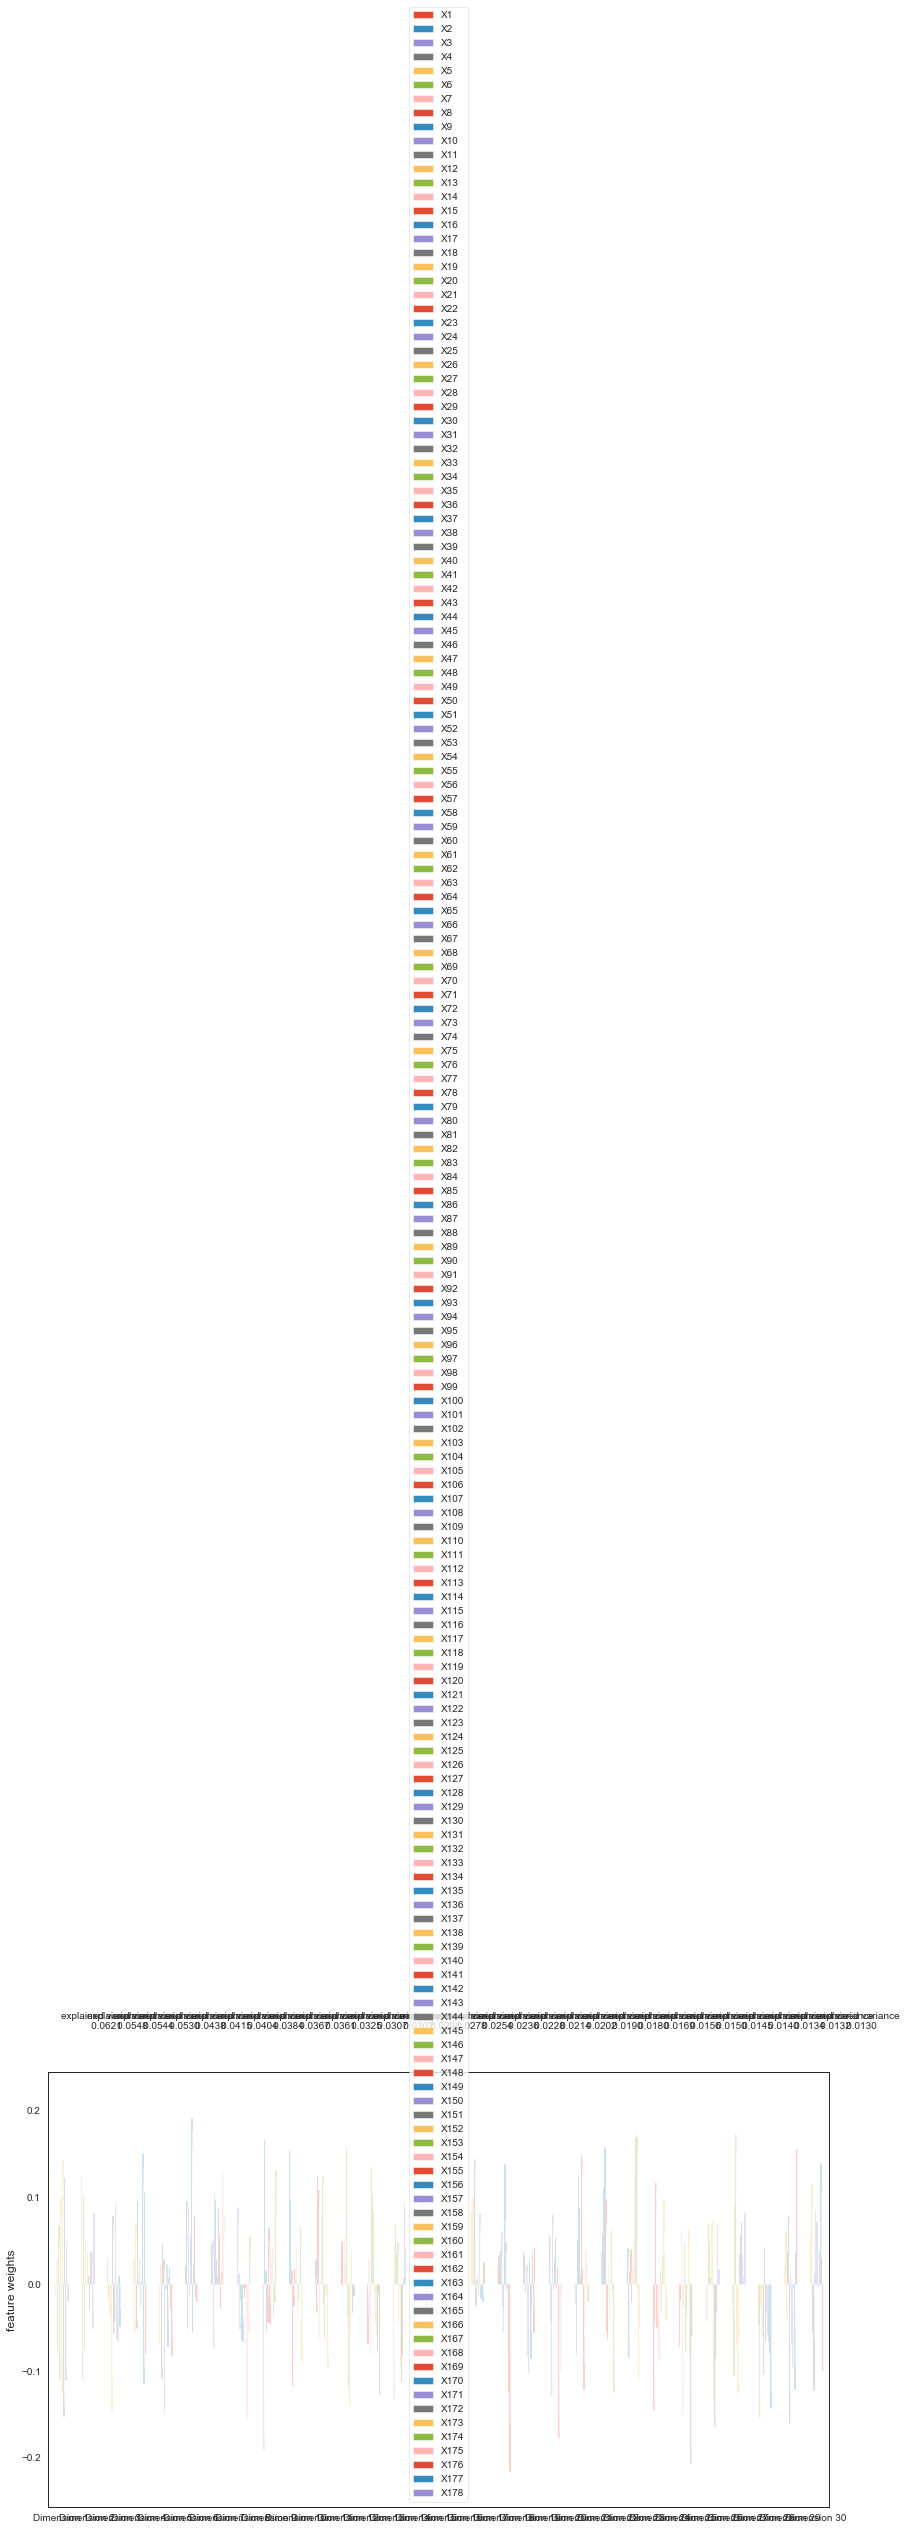

In [68]:
pca_result(df_test1,pca)

In [144]:
def rf(x,y):
    
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)
    
    clf = RandomForestClassifier(n_estimators=300,criterion='entropy',oob_score=True)
    
    clf.fit(x_train,y_train)
    
    y_pred = clf.predict(x_test)
    
    cf = confusion_matrix(y_test,y_pred)
    
    #print(cf) 
    
    print(sns.heatmap(cf,linewidth=0.5,annot=True,fmt='.0f',cmap='YlGnBu'))
    
    roc = roc_auc_score(y_test, y_pred)
    print(roc)
    return roc

AxesSubplot(0.125,0.125;0.62x0.755)
0.9336814435919296


0.9336814435919296

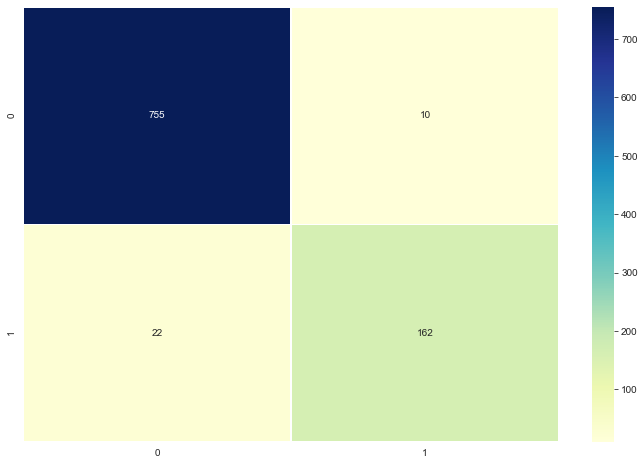

In [145]:
rf(x_pca,y)

In [146]:
def knn(x,y):
    
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)
    
    clf = neighbors.KNeighborsClassifier(algorithm= 'auto', n_neighbors= 7, weights= 'distance')
    
    clf.fit(x_train,y_train)
    
    y_pred = clf.predict(x_test)
    
    cf = confusion_matrix(y_test,y_pred)
    #print(cf)
    
    print(sns.heatmap(cf,annot=True,fmt='.0f',cmap='YlGnBu',linewidth=0.5))
    
    roc = roc_auc_score(y_test, y_pred)
    print(roc)
    return roc

AxesSubplot(0.125,0.125;0.62x0.755)
0.7364130434782609


0.7364130434782609

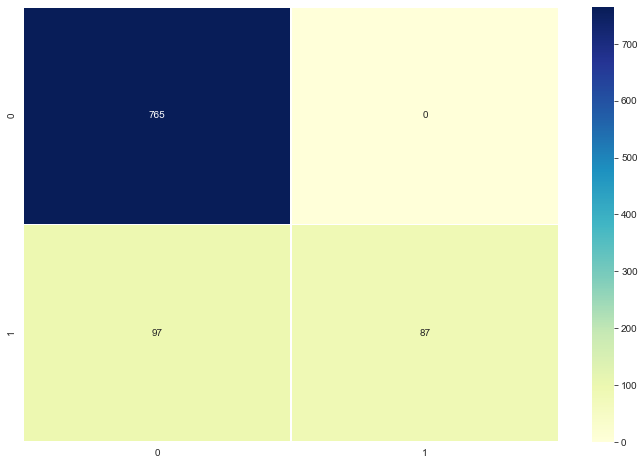

In [147]:
knn(x_pca,y)

## Statistical test for pca models

In [258]:
confidence_interval(0.93368,0.7364,2875,2.58)

(0.17293263929022173, 0.22162736070977807)

<div class='alert alert-block alert-success'>
With 99 % Confidence interval RF- classifier is statistically significant from KNN !

# Feature Selection

## by WEKA

<img src="helper/FE.png" alt="Drawing" style="width: 800px;"/>

In [253]:
df=pd.read_csv('trainmodel.csv')
print('training model shape :',df.shape)
df.head()
df=df.rename(columns={'y':'target'})
df['target']=df['target'].replace(2,0)
df['target']=df['target'].replace(3,0)
df['target']=df['target'].replace(4,0)
df['target']=df['target'].replace(5,0)
x = df[['X1','X11','X12','X20','X26','X27','X33','X43','X44','X61','X68','X83','X84','X94','X95','X103','X124','X131','X137','X154','X160','X173','X176','X178']]
y = df[['target']]
print(x.shape,y.shape)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
sc=StandardScaler()
x_train = sc.fit_transform(x_train)

training model shape : (8625, 180)
(8625, 24) (8625, 1)


In [254]:
df_test = pd.read_csv('testmodel.csv')
print('test model shape :',df_test.shape)
df_test = df_test.drop('s.no',axis=1)
df_test.head()
df_test=df_test.rename(columns={'y':'target'})
df_test['target']=df_test['target'].replace(2,0)
df_test['target']=df_test['target'].replace(3,0)
df_test['target']=df_test['target'].replace(4,0)
df_test['target']=df_test['target'].replace(5,0)
x_test=df_test[['X1','X11','X12','X20','X26','X27','X33','X43','X44','X61','X68','X83','X84','X94','X95','X103','X124','X131','X137','X154','X160','X173','X176','X178']]
x_test = sc.transform(x_test)
y_test = df_test[["target"]]
print('shape after feature selection: ',x_test.shape)

test model shape : (2875, 180)
shape after feature selection:  (2875, 24)


In [187]:
#ensemble  models
adaboost = ensemble.AdaBoostClassifier(n_estimators=300,learning_rate=0.05)
bag = ensemble.BaggingClassifier(n_estimators=300,max_samples=1.00)
extratree = ensemble.ExtraTreesClassifier(n_estimators=300,criterion='entropy',max_depth=6)
gbboost = ensemble.GradientBoostingClassifier(learning_rate=0.05, max_depth= 8, n_estimators=300)
rf = ensemble.RandomForestClassifier(n_estimators=300,criterion='entropy',oob_score=True)


#Gaussian Process
gpc = gaussian_process.GaussianProcessClassifier(max_iter_predict=10)


#GLM
log = linear_model.LogisticRegressionCV(fit_intercept=False,solver='lbfgs')
pac = linear_model.PassiveAggressiveClassifier()
ridge = linear_model.RidgeClassifierCV()
sgd = linear_model.SGDClassifier()
perceptron = linear_model.Perceptron()

#Naive Bayes
nb = naive_bayes.BernoulliNB(alpha=1.0)
nb_gaussian = naive_bayes.GaussianNB()

#knn
knn = neighbors.KNeighborsClassifier(algorithm= 'auto', n_neighbors= 7, weights= 'distance')

#svm
sv = SVC(C= 1, decision_function_shape= 'ovo' , gamma=  0.1, probability= True)
linsvc = LinearSVC()

#Trees
dt = tree.DecisionTreeClassifier()
et = tree.ExtraTreeClassifier()


#Discriminant Analysis 
lda = discriminant_analysis.LinearDiscriminantAnalysis()
qda = discriminant_analysis.QuadraticDiscriminantAnalysis()


#xgboost
xg = XGBClassifier(learning_rate= 0.1, max_depth= 10, n_estimators= 300)


In [188]:
kf = KFold(n_splits=5,shuffle=True,random_state=0)
model = [adaboost,bag,extratree,gbboost,rf,gpc,log,pac,ridge,sgd,perceptron,nb,nb_gaussian,knn,sv,linsvc,dt,et,lda,qda,xg]
MLA_columns = ['MLA Name','MLA Parameters','AUC score','Bias error','Variance error']
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index=0
roc_auc=[]

for alg in model:
    
    
    alg.fit(x_train,y_train)
    y_pred = alg.predict(x_test)

    fpr,tpr,_ = roc_curve(y_test,y_pred)
    roc_auc.append(auc(fpr,tpr))
        
        
    mla_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name']= mla_name
    MLA_compare.loc[row_index,'MLA Parameters'] = str(alg.get_params())
    MLA_compare.loc[row_index, 'AUC score'] = np.mean(roc_auc)
    MLA_compare.loc[row_index, 'Bias  error'] = (1-np.mean(roc_auc))*100
    MLA_compare.loc[row_index, 'Variance error'] = (np.var(roc_auc,ddof=1))*10000
    
    row_index +=1
    
MLA_compare.sort_values(by=['AUC score'],ascending=False,inplace=True)
MLA_compare    

MLA Name  \
1               BaggingClassifier   
4          RandomForestClassifier   
5       GaussianProcessClassifier   
3      GradientBoostingClassifier   
0              AdaBoostClassifier   
2            ExtraTreesClassifier   
6            LogisticRegressionCV   
7     PassiveAggressiveClassifier   
8               RidgeClassifierCV   
20                  XGBClassifier   
14                            SVC   
9                   SGDClassifier   
17            ExtraTreeClassifier   
19  QuadraticDiscriminantAnalysis   
16         DecisionTreeClassifier   
10                     Perceptron   
13           KNeighborsClassifier   
18     LinearDiscriminantAnalysis   
15                      LinearSVC   
12                     GaussianNB   
11                    BernoulliNB   

                                       MLA Parameters AUC score Bias error  \
1   {'base_estimator': None, 'bootstrap': True, 'b...  0.903796        NaN   
4   {'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...  0.891391        NaN   
5   {'copy_X_train': True, 'kernel': None, 'max_it...  0.885877        NaN   
3   {'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...  0.881351        NaN   
0   {'algorithm': 'SAMME.R', 'base_estimator': Non...  0.872903        NaN   
2   {'bootstrap': False, 'ccp_alpha': 0.0, 'class_...  0.867627        NaN   
6   {'Cs': 10, 'class_weight': None, 'cv': None, '...  0.834389        NaN   
7   {'C': 1.0, 'average': False, 'class_weight': N...  0.808137        NaN   
8   {'alphas': array([ 0.1,  1. , 10. ]), 'class_w...  0.774778        NaN   
20  {'objective': 'binary:logistic', 'base_score':...  0.764213        NaN   
14  {'C': 1, 'break_ties': False, 'cache_size': 20...  0.759802        NaN   
9   {'alpha': 0.0001, 'average': False, 'class_wei...  0.758749        NaN   
17  {'ccp_alpha': 0.0, 'class_weight': None, 'crit...  0.758296        NaN   
19  {'priors': None, 'reg_param': 0.0, 'store_cova...   0.75554        NaN   
16  {'ccp_alpha': 0.0, 'class_weight': None, 'crit...  0.752642        NaN   
10  {'alpha': 0.0001, 'class_weight': None, 'early...  0.747385        NaN   
13  {'algorithm': 'auto', 'leaf_size': 30, 'metric...  0.746828        NaN   
18  {'n_components': None, 'priors': None, 'shrink...  0.745754        NaN   
15  {'C': 1.0, 'class_weight': None, 'dual': True,...  0.744279        NaN   
12           {'priors': None, 'var_smoothing': 1e-09}  0.741716        NaN   
11  {'alpha': 1.0, 'binarize': 0.0, 'class_prior':...  0.726769        NaN   

   Variance error  Bias  error  
1         19.0872     9.620410  
4          35.085    10.860916  
5         29.8923    11.412315  
3         40.0602    11.864899  
0             NaN    12.709681  
2         48.7893    13.237303  
6         210.477    16.561050  
7         235.544    19.186300  
8         306.253    22.522171  
20        310.909    23.578686  
14        295.278    24.019763  
9         297.919    24.125087  
17        294.137    24.170418  
19        310.646    24.445955  
16        306.406    24.735830  
10        282.333    25.261535  
13        290.799    25.317206  
18        307.684    25.424638  
15        314.151    25.572130  
12        311.069    25.828422  
11        307.666    27.323074

### statistical test for feature selected models

In [263]:
confidence_interval(0.9037,0.8911,2875,1.440)

(0.0010778996697272739, 0.024122100330272615)

<div class='alert alert-block alert-success'>
With 85 % Confidence interval Bagging classifier is statistically significant from Random-Forest Classifier and other models !

## By Random Forest

In [38]:
df=pd.read_csv('trainmodel.csv')
print('training model shape :',df.shape)
df.head()
df=df.rename(columns={'y':'target'})
df['target']=df['target'].replace(2,0)
df['target']=df['target'].replace(3,0)
df['target']=df['target'].replace(4,0)
df['target']=df['target'].replace(5,0)

training model shape : (8625, 180)


In [39]:
df_test = pd.read_csv('testmodel.csv')
df_test = df_test.drop('s.no',axis=1)
print('test model shape :',df_test.shape)
df_test.head()
df_test=df_test.rename(columns={'y':'target'})
df_test['target']=df_test['target'].replace(2,0)
df_test['target']=df_test['target'].replace(3,0)
df_test['target']=df_test['target'].replace(4,0)
df_test['target']=df_test['target'].replace(5,0)
x = df_test.drop(['target'], axis=1)
#x = sc.transform(x)
y = df_test[["target"]]
x.shape

test model shape : (2875, 179)


(2875, 178)

In [94]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
rf = RandomForestClassifier()

param={'max_depth':[3,None],
      'n_estimators':[300],
      'max_features':list(range(1,x.shape[1])),
      'bootstrap':[True,False],
      'criterion':['entropy']}

gs = RandomizedSearchCV(rf, param_distributions=param)
gs.fit(x,y)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
            

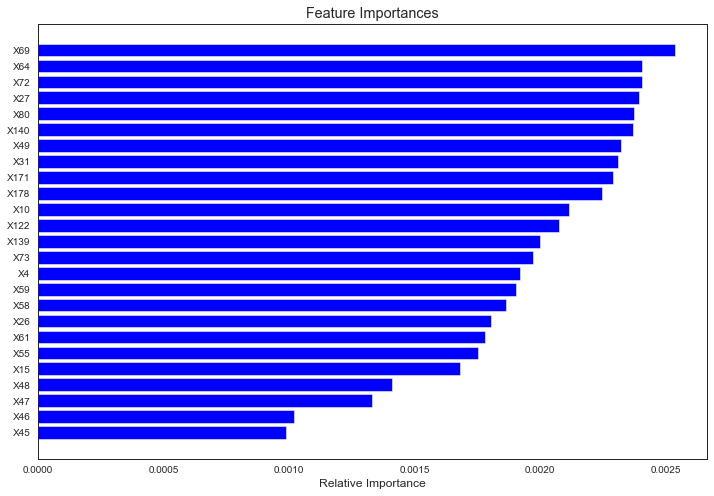

In [100]:
features = df_test.columns[:df_test.shape[1]]
importances = gs.best_estimator_.feature_importances_
indices = np.argsort(importances)[:25]

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance');

In [40]:
x = df[['X69','X64','X72','X27','X80','X140','X49','X31','X171','X178','X10','X122','X139','X73','X4','X59','X58','X26','X61','X55','X15','X48','X47','X46','X45']]
y = df[['target']]
print(x.shape,y.shape)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
sc=StandardScaler()
x_train = sc.fit_transform(x_train)

(8625, 25) (8625, 1)


In [41]:
x_test =df_test[['X69','X64','X72','X27','X80','X140','X49','X31','X171','X178','X10','X122','X139','X73','X4','X59','X58','X26','X61','X55','X15','X48','X47','X46','X45']]
y_test = df_test[["target"]]
x_test = sc.transform(x_test)

In [343]:
print(x_test.shape,y_test.shape)

(2875, 25) (2875, 1)


In [201]:
#ensemble  models
adaboost = ensemble.AdaBoostClassifier(n_estimators=300,learning_rate=0.05)
bag = ensemble.BaggingClassifier(n_estimators=300,max_samples=1.00)
extratree = ensemble.ExtraTreesClassifier(n_estimators=300,criterion='entropy',max_depth=6)
gbboost = ensemble.GradientBoostingClassifier(learning_rate=0.05, max_depth= 8, n_estimators=300)
rf = ensemble.RandomForestClassifier(n_estimators=300,criterion='entropy',oob_score=True)


#Gaussian Process
gpc = gaussian_process.GaussianProcessClassifier(max_iter_predict=10)


#GLM
log = linear_model.LogisticRegressionCV(fit_intercept=False,solver='lbfgs')
pac = linear_model.PassiveAggressiveClassifier()
ridge = linear_model.RidgeClassifierCV()
sgd = linear_model.SGDClassifier()
perceptron = linear_model.Perceptron()

#Naive Bayes
nb = naive_bayes.BernoulliNB(alpha=1.0)
nb_gaussian = naive_bayes.GaussianNB()

#knn
knn = neighbors.KNeighborsClassifier(algorithm= 'auto', n_neighbors= 7, weights= 'distance')

#svm
sv = SVC(C= 1, decision_function_shape= 'ovo' , gamma=  0.1, probability= True)
linsvc = LinearSVC()

#Trees
dt = tree.DecisionTreeClassifier()
et = tree.ExtraTreeClassifier()


#Discriminant Analysis 
lda = discriminant_analysis.LinearDiscriminantAnalysis()
qda = discriminant_analysis.QuadraticDiscriminantAnalysis()


#xgboost
xg = XGBClassifier(learning_rate= 0.1, max_depth= 10, n_estimators= 300)


In [202]:
kf = KFold(n_splits=5,shuffle=True,random_state=0)
model = [adaboost,bag,extratree,gbboost,rf,gpc,log,pac,ridge,sgd,perceptron,nb,nb_gaussian,knn,sv,linsvc,dt,et,lda,qda,xg]
MLA_columns = ['MLA Name','MLA Parameters','AUC score','Bias error','Variance error']
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index=0
roc_auc=[]

for alg in model:
    
    
    alg.fit(x_train,y_train)
    y_pred = alg.predict(x_test)

    fpr,tpr,_ = roc_curve(y_test,y_pred)
    roc_auc.append(auc(fpr,tpr))
        
        
    mla_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name']= mla_name
    MLA_compare.loc[row_index,'MLA Parameters'] = str(alg.get_params())
    MLA_compare.loc[row_index, 'AUC score'] = np.mean(roc_auc)
    MLA_compare.loc[row_index, 'Bias  error'] = (1-np.mean(roc_auc))*100
    MLA_compare.loc[row_index, 'Variance error'] = (np.var(roc_auc,ddof=1))*10000
    
    row_index +=1
    
MLA_compare.sort_values(by=['AUC score'],ascending=False,inplace=True)
MLA_compare    

MLA Name  \
1               BaggingClassifier   
4          RandomForestClassifier   
5       GaussianProcessClassifier   
3      GradientBoostingClassifier   
2            ExtraTreesClassifier   
0              AdaBoostClassifier   
6            LogisticRegressionCV   
7     PassiveAggressiveClassifier   
8               RidgeClassifierCV   
20                  XGBClassifier   
9                   SGDClassifier   
17            ExtraTreeClassifier   
14                            SVC   
19  QuadraticDiscriminantAnalysis   
16         DecisionTreeClassifier   
18     LinearDiscriminantAnalysis   
10                     Perceptron   
13           KNeighborsClassifier   
15                      LinearSVC   
12                     GaussianNB   
11                    BernoulliNB   

                                       MLA Parameters AUC score Bias error  \
1   {'base_estimator': None, 'bootstrap': True, 'b...  0.896315        NaN   
4   {'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...  0.884142        NaN   
5   {'copy_X_train': True, 'kernel': None, 'max_it...  0.877384        NaN   
3   {'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...  0.875748        NaN   
2   {'bootstrap': False, 'ccp_alpha': 0.0, 'class_...  0.862568        NaN   
0   {'algorithm': 'SAMME.R', 'base_estimator': Non...  0.860612        NaN   
6   {'Cs': 10, 'class_weight': None, 'cv': None, '...   0.82817        NaN   
7   {'C': 1.0, 'average': False, 'class_weight': N...  0.802484        NaN   
8   {'alphas': array([ 0.1,  1. , 10. ]), 'class_w...  0.769265        NaN   
20  {'objective': 'binary:logistic', 'base_score':...   0.75511        NaN   
9   {'alpha': 0.0001, 'average': False, 'class_wei...  0.753832        NaN   
17  {'ccp_alpha': 0.0, 'class_weight': None, 'crit...  0.749711        NaN   
14  {'C': 1, 'break_ties': False, 'cache_size': 20...   0.74925        NaN   
19  {'priors': None, 'reg_param': 0.0, 'store_cova...  0.746486        NaN   
16  {'ccp_alpha': 0.0, 'class_weight': None, 'crit...  0.742699        NaN   
18  {'n_components': None, 'priors': None, 'shrink...  0.737123        NaN   
10  {'alpha': 0.0001, 'class_weight': None, 'early...  0.736489        NaN   
13  {'algorithm': 'auto', 'leaf_size': 30, 'metric...   0.73604        NaN   
15  {'C': 1.0, 'class_weight': None, 'dual': True,...  0.733837        NaN   
12           {'priors': None, 'var_smoothing': 1e-09}  0.731078        NaN   
11  {'alpha': 1.0, 'binarize': 0.0, 'class_prior':...  0.716782        NaN   

   Variance error  Bias  error  
1         25.4939    10.368478  
4         32.1916    11.585815  
5         28.4931    12.261568  
3         38.2246    12.425235  
2         46.9141    13.743242  
0             NaN    13.938766  
6         193.289    17.183013  
7         218.458    19.751628  
8         290.465    23.073503  
20        311.666    24.488982  
9          282.01    24.616836  
17        296.819    25.028914  
14        293.691    25.074988  
19        311.627    25.351439  
16        305.968    25.730081  
18        310.435    26.287683  
10        286.891    26.351061  
13        288.095    26.395962  
15        312.123    26.616325  
12        308.368    26.892190  
11        307.416    28.321805

### Statistical test !

In [271]:
confidence_interval(0.8963,0.88414,2875,1.440)

(0.000289016557329623, 0.024030983442670274)

<div class='alert alert-block alert-success'>
With 99 % Confidence interval Bagging Classifier is statistically significant from Logistic RegressionCV Classifier and KNN !

In [274]:
import time
start= time.perf_counter()
model = gaussian_process.GaussianProcessClassifier(max_iter_predict=10)
model.fit(x_train,y_train)
mod_pred = model.predict(x_test)
end_gpa = (time.perf_counter() - start)
roc = roc_auc_score(y_test, mod_pred)
print(f'{model.__class__.__name__} took {end_gpa} seconds to predict')
print("Gaussian Process Classifier ROC:",roc)
#print(classification_report(y,mod_pred))
cm = confusion_matrix(y_test,mod_pred)
#sns.heatmap(cm,annot=True,fmt='.0f',cmap='YlGnBu')
#plt.xlabel("Predicted Values")
#plt.ylabel("Actual Values")
#plt.title("Gaussian Process Classifier Matrix\n\n")#
plt.show()

GaussianProcessClassifier took 49.629736499999126 seconds to predict
Gaussian Process Classifier ROC: 0.8435966691918537


In [276]:
start= time.perf_counter()
model = RandomForestClassifier(n_estimators=300,criterion='entropy',oob_score=True)
model.fit(x_train, y_train)
mod_pred = model.predict(x_test)
end_rfa = (time.perf_counter() - start)
roc = roc_auc_score(y_test, mod_pred)
print("Random Forest ROC:",roc)
print(f'{model.__class__.__name__} took {end_rfa} seconds to predict')
#print(classification_report(y,mod_pred))
#rf_cm = confusion_matrix(y,mod_pred)
#sns.heatmap(rf_cm,annot=True,fmt='.0f',cmap='YlGnBu')
#plt.xlabel("Predicted Values")
#plt.ylabel("Actual Values")
#plt.title("Random Forest Validation Matrix\n\n")
#plt.show()

Random Forest ROC: 0.915949757414371
RandomForestClassifier took 7.014653099999123 seconds to predict


In [344]:
start= time.perf_counter()
model = ensemble.BaggingClassifier(n_estimators=300,max_samples=1.00)
model.fit(x_train, y_train)
mod_pred = model.predict(x_test)
end_bgc = (time.perf_counter() - start)
roc = roc_auc_score(y_test, mod_pred)
print("Bagging Classifier ROC:",roc)
print(f'{model.__class__.__name__} took {end_bgc} seconds to predict')
#print(classification_report(y,mod_pred))
#rf_cm = confusion_matrix(y,mod_pred)
#sns.heatmap(rf_cm,annot=True,fmt='.0f',cmap='YlGnBu')
#plt.xlabel("Predicted Values")
#plt.ylabel("Actual Values")
#plt.title("Random Forest Validation Matrix\n\n")
#plt.show()

Bagging Classifier ROC: 0.9326800110356265
BaggingClassifier took 44.78392150000036 seconds to predict


In [ ]:
bgcb
gpb
svb

gpa
rfa
bgc

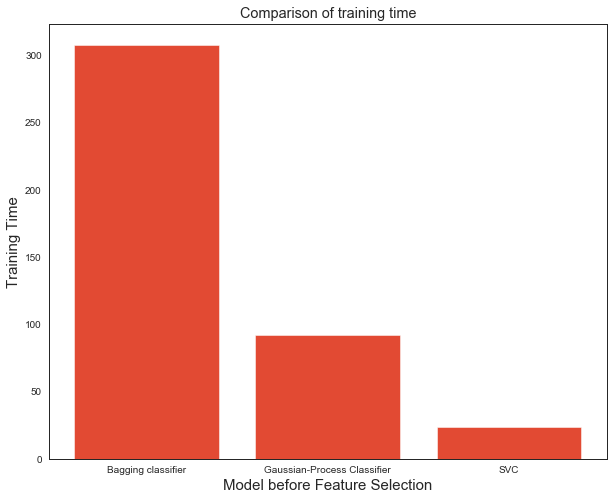

In [349]:
model=['Bagging classifier','Gaussian-Process Classifier','SVC']
train_time=[
    end_bgcb,
    end_gpb,
    end_svb
]

index=np.arange(len(model))
plt.figure(figsize=(10,8))
plt.bar(index,train_time)
plt.xlabel('Model before Feature Selection',fontsize=15)
plt.ylabel('Training Time',fontsize=15)
plt.xticks(index,model,fontsize=10)
plt.title('Comparison of training time')
plt.show()

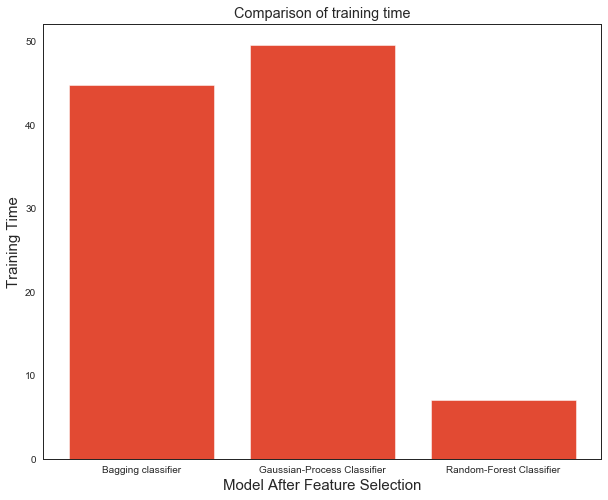

In [350]:
model=['Bagging classifier','Gaussian-Process Classifier','Random-Forest Classifier']
train_time=[
    end_bgc,
    end_gpa,
    end_rfa,
    
]

index=np.arange(len(model))
plt.figure(figsize=(10,8))
plt.bar(index,train_time)
plt.xlabel('Model After Feature Selection',fontsize=15)
plt.ylabel('Training Time',fontsize=15)
plt.xticks(index,model,fontsize=10)
plt.title('Comparison of training time')
plt.show()

In [43]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((6900, 25), (6900, 1), (2875, 25), (2875, 1))

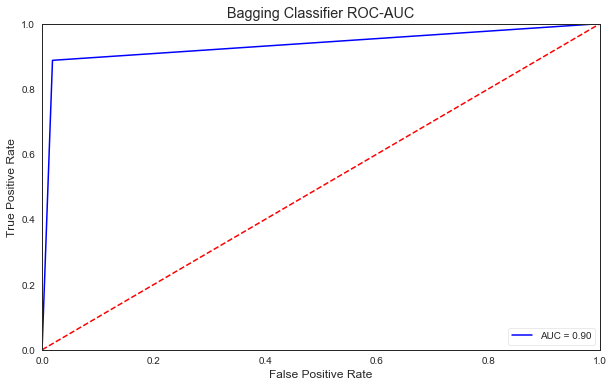

In [44]:
model = ensemble.BaggingClassifier(n_estimators=300,max_samples=1.00)
model.fit(x_train, y_train)
mod_pred = model.predict(x_test)
roc = roc_auc_score(y_test, mod_pred)
fpr, tpr, threshold = metrics.roc_curve(y_test, mod_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(10,6))
plt.title('Bagging Classifier ROC-AUC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
import pandas_profiling
pandas_profiling.ProfileReport(df_test)